# Conversational Data Analysis Using Convokit (Captone Project)(Part 2)

Link for GAP Corpus https://convokit.cornell.edu/documentation/gap.html \
Fuzzy Clustering https://pypi.org/project/fuzzy-c-means/

In [2]:
# pip install fuzzy-c-means
# pip install numpy --upgrade
# pip install pandas --upgrade

# Watch out for this . After installing it might give an error
# pip install numpy --upgrade
# Upgrade Numpy and Pandas or else an error  will be raised
# Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
# Please make sure numpy and pandas are of the same version



In [3]:
import convokit
from convokit import Corpus, download
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fcmeans import FCM
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import scipy.cluster.hierarchy as sch

# Download GAP Corpus 

The following code is used download the corpus. To analyze basic structure of the corpus presented. All this information regarding the methods can be found in the documentation : Link for documentation : https://convokit.cornell.edu/documentation/tutorial.html

In [4]:
gap_corpus = Corpus(download('gap-corpus'))

Dataset already exists at C:\Users\pulki\.convokit\downloads\gap-corpus


In [5]:
rand_utt = gap_corpus.random_utterance()

In [6]:
print(rand_utt)

Utterance(id: '7.Green.80', conversation_id: 7.Orange.1, reply-to: 7.Blue.41, speaker: Speaker(id: 7.Green, vectors: [], meta: {'Year at UFV': 2, 'Gender': 1, 'English': 1, 'AIS': 80.0, 'AII': 26.0, 'Ind_TE': 3, 'Ind_WW': 4.0, 'Ind_TM': 5.0, 'Ind_Eff': 5.0, 'Ind_QW': 5.0, 'Ind_Sat': 4.4, 'Ind_Lead': 3, 'Group Number': '7'}), timestamp: 05:41.3, text: '"Yeah"', vectors: [], meta: {'End': '05:42.3', 'Duration': '00:01.0', 'Sentiment': nan, 'Decision': nan, 'Private': nan, 'Survival Item': nan})


### Meta data Information

In [7]:
print(rand_utt.meta)

{'End': '05:42.3', 'Duration': '00:01.0', 'Sentiment': nan, 'Decision': nan, 'Private': nan, 'Survival Item': nan}


In [8]:
rand_utt

Utterance({'obj_type': 'utterance', 'meta': {'End': '05:42.3', 'Duration': '00:01.0', 'Sentiment': nan, 'Decision': nan, 'Private': nan, 'Survival Item': nan}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'Year at UFV': 2, 'Gender': 1, 'English': 1, 'AIS': 80.0, 'AII': 26.0, 'Ind_TE': 3, 'Ind_WW': 4.0, 'Ind_TM': 5.0, 'Ind_Eff': 5.0, 'Ind_QW': 5.0, 'Ind_Sat': 4.4, 'Ind_Lead': 3, 'Group Number': '7'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x000001EC3B6B8308>, 'id': '7.Green'}), 'conversation_id': '7.Orange.1', 'reply_to': '7.Blue.41', 'timestamp': '05:41.3', 'text': '"Yeah"', 'owner': <convokit.model.corpus.Corpus object at 0x000001EC3B6B8308>, 'id': '7.Green.80'})

In [9]:
gap_corpus.random_speaker()

Speaker({'obj_type': 'speaker', 'meta': {'Year at UFV': 2, 'Gender': 2, 'English': 1, 'AIS': 88.0, 'AII': 30.0, 'Ind_TE': 4, 'Ind_WW': 3.0, 'Ind_TM': 4.0, 'Ind_Eff': 4.0, 'Ind_QW': 4.0, 'Ind_Sat': 3.8, 'Ind_Lead': 3, 'Group Number': '5'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x000001EC3B6B8308>, 'id': '5.Orange'})

# Display all Utterance as dataframe 

In [10]:
df_gap_utt = gap_corpus.get_utterances_dataframe()
display(df_gap_utt[0:3])

,timestamp,text,speaker,reply_to,conversation_id,meta.End,meta.Duration,meta.Sentiment,meta.Decision,meta.Private,meta.Survival Item,vectors
id,,,,,,,,,,,,
1.Pink.1,00:02.0,"""So what did everyone do as one""",1.Pink,None,1.Pink.1,00:03.5,00:01.5,NaN,NaN,NaN,NaN,[]
1.Blue.1,00:04.0,"""I did uh cigarette lighter""",1.Blue,1.Pink.1,1.Pink.1,00:05.7,00:01.7,NaN,NaN,Private,Cigarette Lighter,[]
1.Blue.2,00:06.4,"""For one""",1.Blue,1.Blue.1,1.Pink.1,00:07.2,00:00.7,NaN,NaN,Private,Cigarette Lighter,[]


In [11]:
df_gap_convo = gap_corpus.get_conversations_dataframe()
df_gap_convo[0:3]

,vectors,meta.Group Number,meta.Meeting Size,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,,,,
1.Pink.1,[],1,3.0,9.75,78.0,4.67,5.0,5.0,4.67,5.0,4.87
10.Orange.1,[],10,2.0,3.88,72.0,5.0,4.0,4.5,5.0,4.0,4.42
11.Pink.1,[],11,2.0,12.65,82.0,2.5,4.0,4.5,1.5,4.0,3.3


In [12]:
df_gap_convo.shape

(28, 11)

In [13]:
df_gap_speaker = gap_corpus.get_speakers_dataframe()
df_gap_speaker[0:3]

,vectors,meta.Year at UFV,meta.Gender,meta.English,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead,meta.Group Number
id,,,,,,,,,,,,,,
1.Pink,[],4,2,1,88.0,40.0,5,5.0,5.0,5.0,5.0,5.0,5,1
1.Blue,[],1,2,1,64.0,76.0,5,5.0,5.0,5.0,5.0,5.0,2,1
1.Green,[],6,1,2,85.0,12.0,4,5.0,5.0,4.0,5.0,4.6,4,1


In [14]:
df_gap_speaker.shape

(84, 14)

# Data Visualization Using Matplotlib and seaborn

In [15]:
df_gap_convo[0:4]

,vectors,meta.Group Number,meta.Meeting Size,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,,,,
1.Pink.1,[],1,3.0,9.75,78.0,4.67,5.0,5.0,4.67,5.0,4.87
10.Orange.1,[],10,2.0,3.88,72.0,5.0,4.0,4.5,5.0,4.0,4.42
11.Pink.1,[],11,2.0,12.65,82.0,2.5,4.0,4.5,1.5,4.0,3.3
12.Blue.1,[],12,4.0,5.2,90.0,4.25,4.75,4.75,4.5,4.75,4.6


In [16]:
df_gap_speaker.head()

,vectors,meta.Year at UFV,meta.Gender,meta.English,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead,meta.Group Number
id,,,,,,,,,,,,,,
1.Pink,[],4,2,1,88.0,40.0,5,5.0,5.0,5.0,5.0,5.0,5,1
1.Blue,[],1,2,1,64.0,76.0,5,5.0,5.0,5.0,5.0,5.0,2,1
1.Green,[],6,1,2,85.0,12.0,4,5.0,5.0,4.0,5.0,4.6,4,1
10.Orange,[],4,2,1,55.0,56.0,5,4.0,5.0,5.0,4.0,4.6,4,10
10.Pink,[],1,1,1,57.0,33.0,5,4.0,4.0,5.0,4.0,4.4,3,10


# 1a. Data visualization for speaker dataframe

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5)

## Count plots

Count plot for number of Students based on their year at UFV

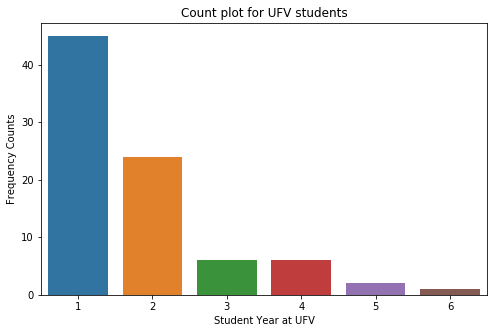

1    45
2    24
4     6
3     6
5     2
6     1
Name: meta.Year at UFV, dtype: int64


In [18]:
# Build count plots of various features 
sns.countplot(data = df_gap_speaker, x = 'meta.Year at UFV' )
plt.title("Count plot for UFV students")
plt.ylabel("Frequency Counts")
plt.xlabel("Student Year at UFV")
plt.show()
print(df_gap_speaker['meta.Year at UFV'].value_counts())



**************** Count Plot based on Gender ************


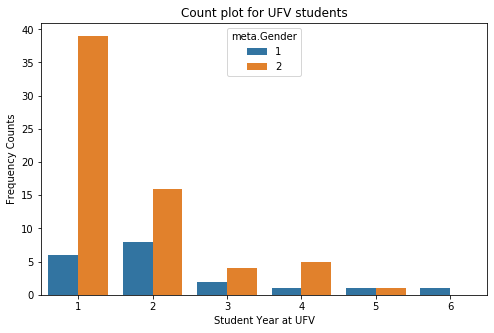

***** Value counts for Student Year at UFV****
1    45
2    24
4     6
3     6
5     2
6     1
Name: meta.Year at UFV, dtype: int64


In [19]:
print("\n\n**************** Count Plot based on Gender ************")
ax_2 = sns.countplot(data = df_gap_speaker, x = 'meta.Year at UFV', hue = 'meta.Gender')
plt.title("Count plot for UFV students")
plt.ylabel("Frequency Counts")
plt.xlabel("Student Year at UFV")
plt.show()
print("***** Value counts for Student Year at UFV****")
print(df_gap_speaker['meta.Year at UFV'].value_counts())



**************** Count Plot of UFV Students based on Gender and ESL Speakers************


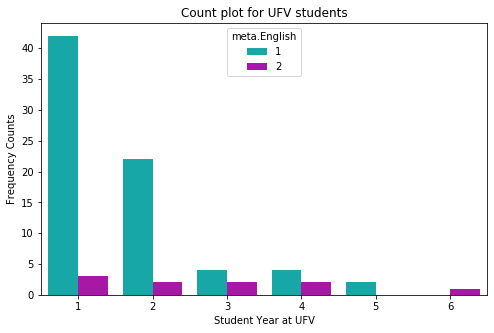

***** Value counts for ESL and Non ESL Students ****
1    74
2    10
Name: meta.English, dtype: int64


In [20]:
print("\n\n**************** Count Plot of UFV Students based on Gender and ESL Speakers************")

# Let us use palette argument to change colors of bar chart
ax = sns.countplot(data = df_gap_speaker, x = 'meta.Year at UFV', hue = 'meta.English', palette=['c','m'])
plt.title("Count plot for UFV students")
plt.ylabel("Frequency Counts")
plt.xlabel("Student Year at UFV")
plt.show()
print("***** Value counts for ESL and Non ESL Students ****")
print(df_gap_speaker['meta.English'].value_counts())

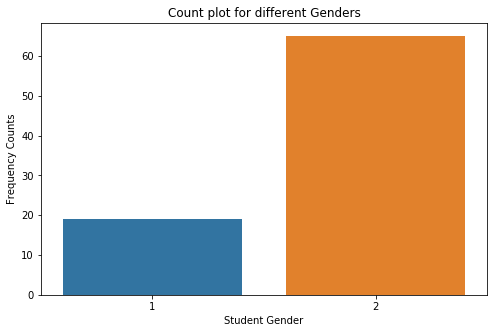

***************** Value Count for Gender *************** 
2    65
1    19
Name: meta.Gender, dtype: int64


In [21]:
ax_3 = sns.countplot(data = df_gap_speaker, x = 'meta.Gender' )
plt.title("Count plot for different Genders")
plt.ylabel("Frequency Counts")
plt.xlabel("Student Gender")
plt.show()
print("***************** Value Count for Gender *************** ")
print(df_gap_speaker['meta.Gender'].value_counts())

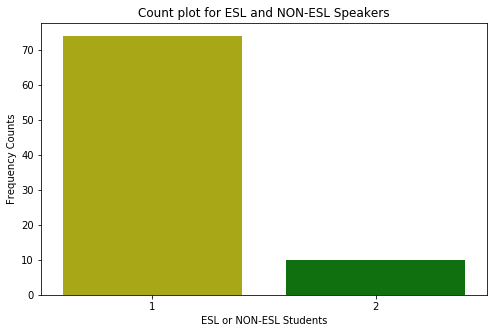

***************** Value Count for ESL and Non ESL Students *************** 
1    74
2    10
Name: meta.English, dtype: int64


In [22]:
ax_4 = sns.countplot(data = df_gap_speaker, x = 'meta.English', palette = ['y','g'] )
plt.title("Count plot for ESL and NON-ESL Speakers")
plt.ylabel("Frequency Counts")
plt.xlabel("ESL or NON-ESL Students")
plt.show()
print("***************** Value Count for ESL and Non ESL Students *************** ")
print(df_gap_speaker['meta.English'].value_counts())

#### Count Plots for Other features

In [23]:
features = ['meta.Ind_TE', 'meta.Ind_WW','meta.Ind_TM','meta.Ind_Eff','meta.Ind_QW']

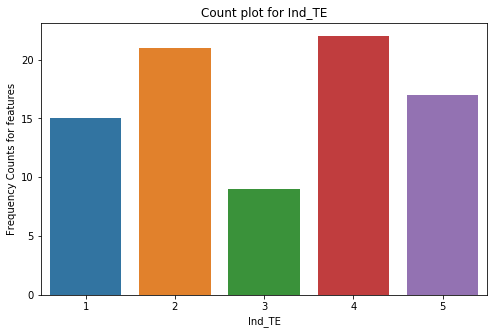

***************** Value Count for Ind_TE *************** 
4    22
2    21
5    17
1    15
3     9
Name: meta.Ind_TE, dtype: int64


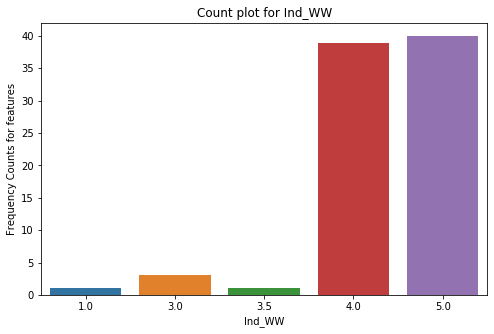

***************** Value Count for Ind_WW *************** 
5.0    40
4.0    39
3.0     3
3.5     1
1.0     1
Name: meta.Ind_WW, dtype: int64


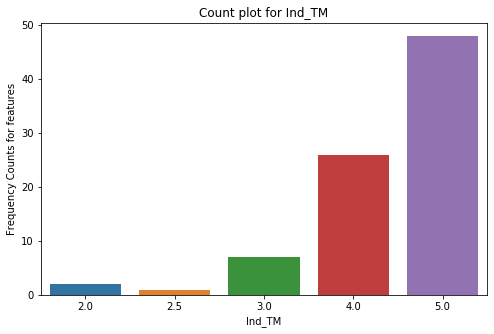

***************** Value Count for Ind_TM *************** 
5.0    48
4.0    26
3.0     7
2.0     2
2.5     1
Name: meta.Ind_TM, dtype: int64


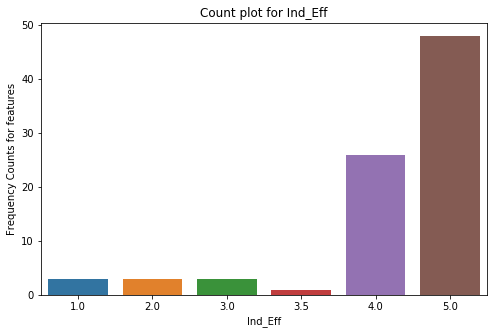

***************** Value Count for Ind_Eff *************** 
5.0    48
4.0    26
2.0     3
1.0     3
3.0     3
3.5     1
Name: meta.Ind_Eff, dtype: int64


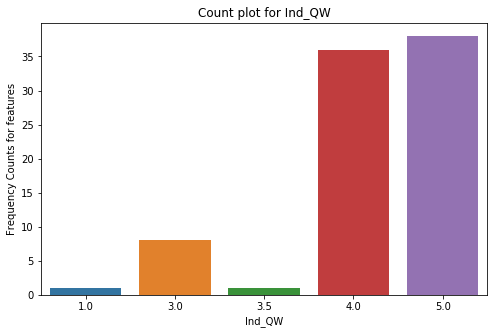

***************** Value Count for Ind_QW *************** 
5.0    38
4.0    36
3.0     8
3.5     1
1.0     1
Name: meta.Ind_QW, dtype: int64


In [24]:
for i in features:
    sns.countplot(data = df_gap_speaker, x = i)
    plt.title(f"Count plot for {i[5:]}")
    plt.ylabel("Frequency Counts for features")
    plt.xlabel(f"{i[5:]}")
    plt.show()
    print(f"***************** Value Count for {i[5:]} *************** ")
    print(df_gap_speaker[i].value_counts())



# CATEGORY PLOTS

Text(0.5, 1.0, "Categorical Plot for AII and Participant's Year at UFV ")

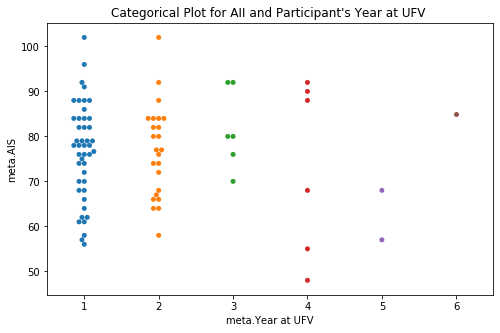

In [25]:
sns.swarmplot(data = df_gap_speaker, x = "meta.Year at UFV", y = "meta.AIS")
plt.title("Categorical Plot for AII and Participant's Year at UFV ")

Text(0.5, 1, "Categorical Plot for AII and Participant's Year at UFV ")

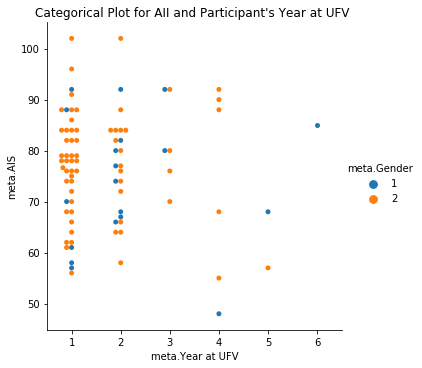

In [26]:
sns.catplot(data = df_gap_speaker, x = "meta.Year at UFV", y = "meta.AIS", kind = "swarm", hue = 'meta.Gender')
plt.title("Categorical Plot for AII and Participant's Year at UFV ")

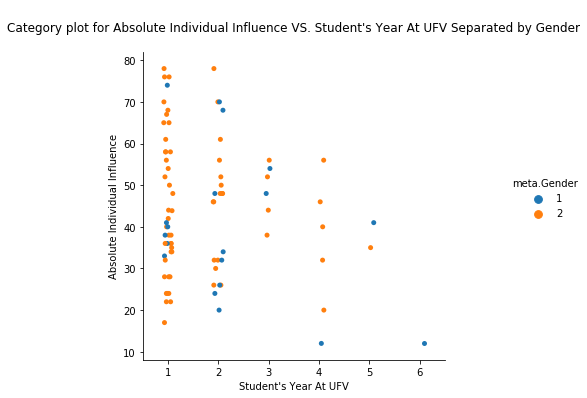

In [27]:
ax_5 = sns.catplot(data = df_gap_speaker, x = "meta.Year at UFV", 
                   y = "meta.AII", hue = 'meta.Gender')

plt.title("\nCategory plot for Absolute Individual Influence VS. Student's Year At UFV Separated by Gender\n",loc = 'center')
plt.xlabel("Student's Year At UFV")
plt.ylabel("Absolute Individual Influence")
plt.show()

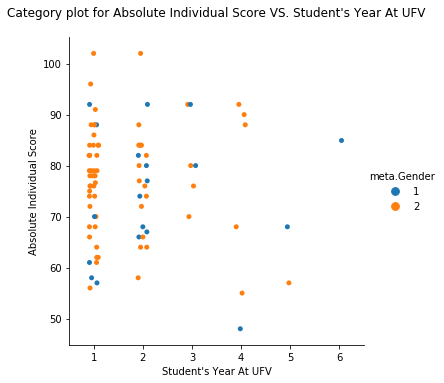

In [28]:
ax_6 = sns.catplot(data = df_gap_speaker, x = "meta.Year at UFV", 
                   y = "meta.AIS", hue = 'meta.Gender')

plt.title("Category plot for Absolute Individual Score VS. Student's Year At UFV\n")
plt.xlabel("Student's Year At UFV")
plt.ylabel("Absolute Individual Score")
plt.show()


In [29]:
df_gap_speaker.head()

,vectors,meta.Year at UFV,meta.Gender,meta.English,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead,meta.Group Number
id,,,,,,,,,,,,,,
1.Pink,[],4,2,1,88.0,40.0,5,5.0,5.0,5.0,5.0,5.0,5,1
1.Blue,[],1,2,1,64.0,76.0,5,5.0,5.0,5.0,5.0,5.0,2,1
1.Green,[],6,1,2,85.0,12.0,4,5.0,5.0,4.0,5.0,4.6,4,1
10.Orange,[],4,2,1,55.0,56.0,5,4.0,5.0,5.0,4.0,4.6,4,10
10.Pink,[],1,1,1,57.0,33.0,5,4.0,4.0,5.0,4.0,4.4,3,10


# BOXPLOT FOR VARIOUS FEATURES 

Text(0.5, 1, "Box Plot for AIS and Participant's Year at UFV ")

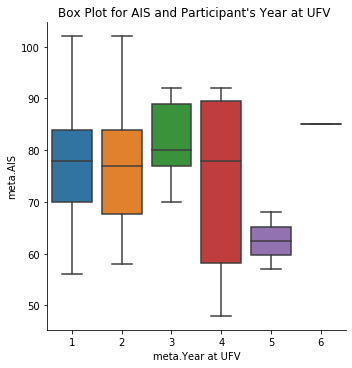

In [30]:

sns.catplot(kind = 'box', y = 'meta.AIS', x = 'meta.Year at UFV', data = df_gap_speaker )
plt.title("Box Plot for AIS and Participant's Year at UFV ")

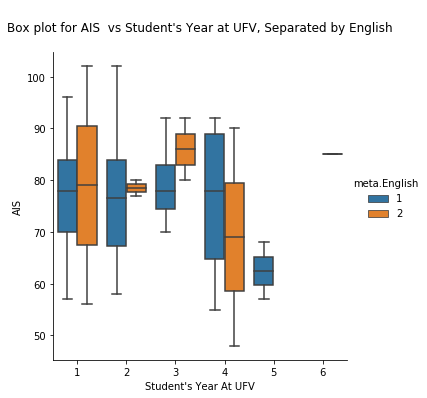

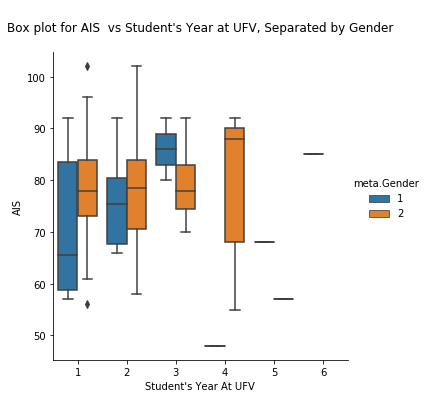

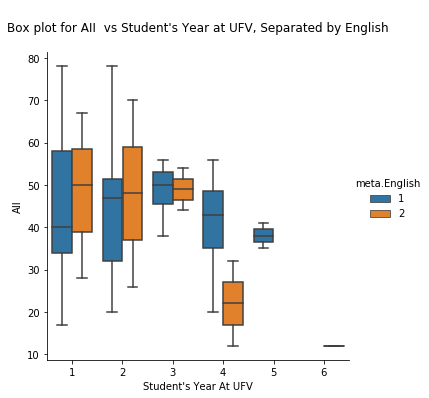

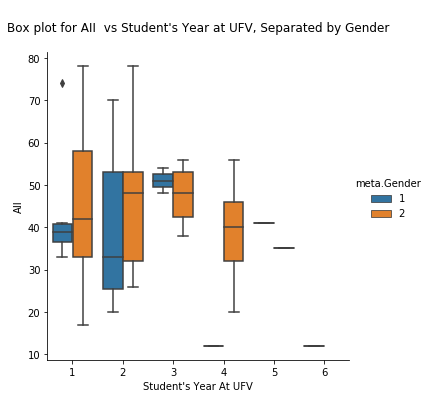

In [31]:
list_features = ['meta.AIS','meta.AII']
hue_features = ['meta.English','meta.Gender']

for i in list_features:
    for j in hue_features:
        sns.catplot(kind = 'box', y = i, x = 'meta.Year at UFV', data = df_gap_speaker, hue = j )
        plt.title(f"\nBox plot for {i[5:]}  vs Student's Year at UFV, Separated by {j[5:]}\n")
        plt.ylabel(i[5:])
        plt.xlabel("Student's Year At UFV")
        plt.show()
    

# Joint Plots And ScatterPlots 

In [32]:
continuous_features = ["meta.AII","meta.AIS"]

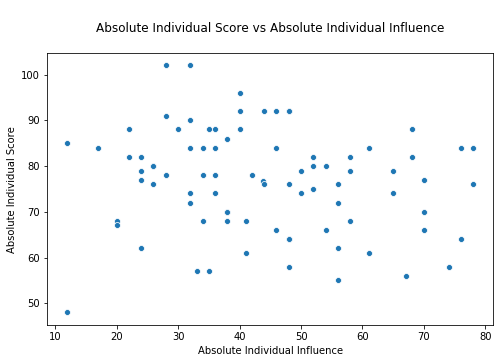

In [33]:
ax_7 = sns.scatterplot (x ="meta.AII",  y= "meta.AIS", data = df_gap_speaker)
plt.title('\nAbsolute Individual Score vs Absolute Individual Influence\n')
plt.xlabel("Absolute Individual Influence")
plt.ylabel("Absolute Individual Score")
plt.show()

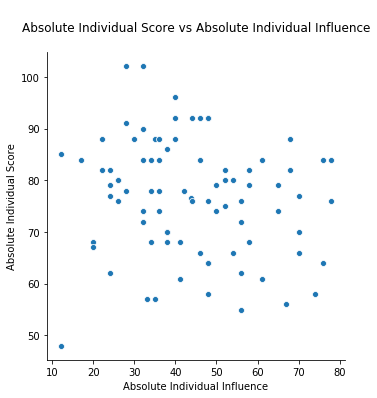

In [34]:
#Similar result can be obtained using relplot and using kind = 'scatter'

ax_8 = sns.relplot (x ="meta.AII",  y= "meta.AIS", data = df_gap_speaker, kind = 'scatter')
plt.title('\nAbsolute Individual Score vs Absolute Individual Influence\n')
plt.xlabel("Absolute Individual Influence")
plt.ylabel("Absolute Individual Score")
plt.show()

In [35]:
#Joint plot with different argument for kind 


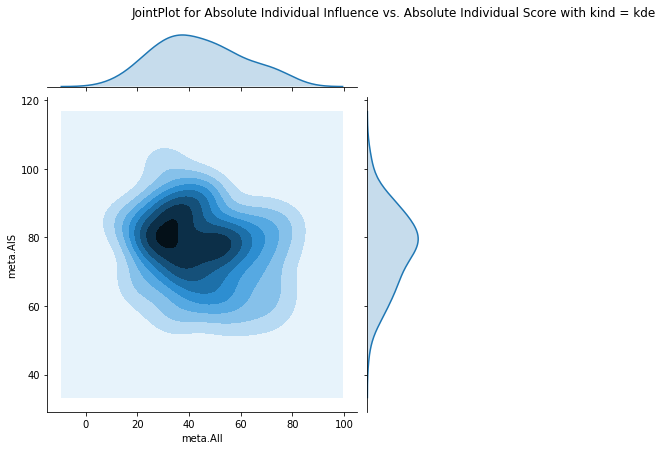

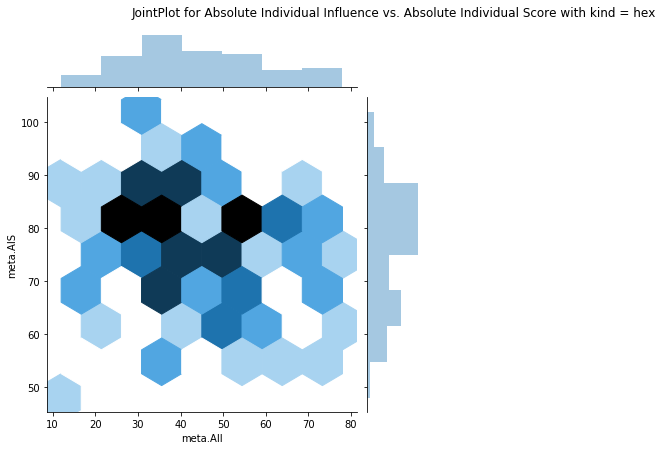

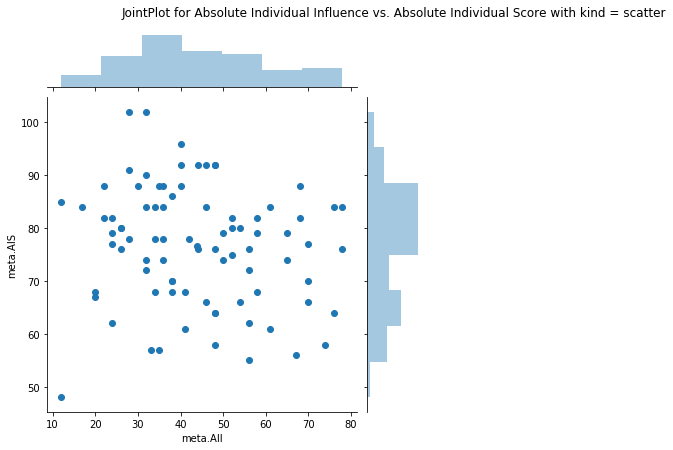

In [36]:
feature = ['kde','hex','scatter']

for x in feature:
    sns.jointplot(x = "meta.AII" , y= "meta.AIS", data = df_gap_speaker, kind = x)
    plt.title("JointPlot for Absolute Individual Influence vs. Absolute" 
              f" Individual Score with kind = {x}\n\n\n\n\n", loc='center')
    plt.show()

### CAUTION IF USING NEWER VERSION MATPLOT AND SEABORN AND ERROR MAY BE RAISED.  
USE THE FOLLOWING CODE

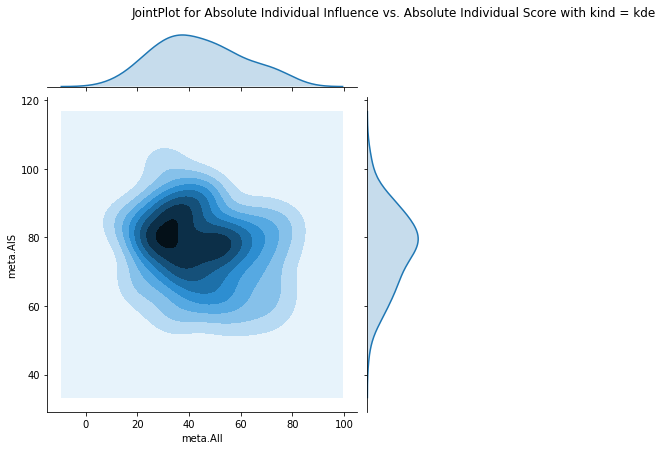

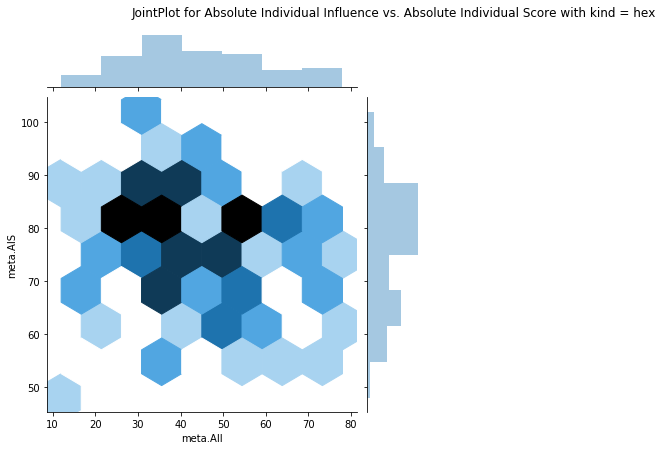

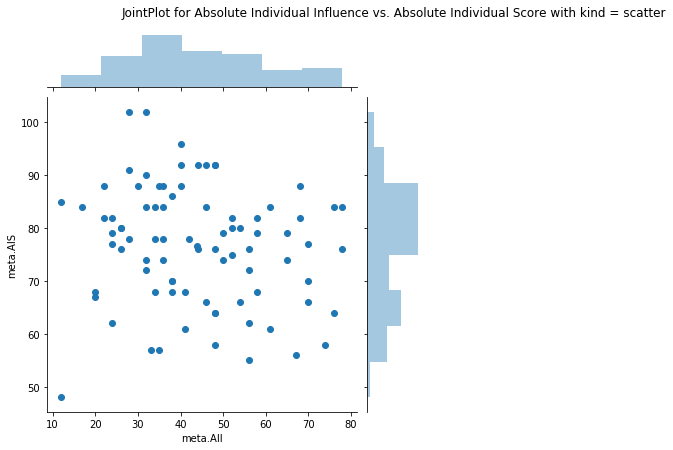

In [37]:
feature = ['kde','hex','scatter']

d1 = df_gap_speaker["meta.AII"].astype("float")
d2 = df_gap_speaker["meta.AIS"].astype("float")

for x in feature:
    sns.jointplot(x = "meta.AII" , y= "meta.AIS", data = df_gap_speaker, kind = x)
    plt.title("JointPlot for Absolute Individual Influence vs. Absolute" 
              f" Individual Score with kind = {x}\n\n\n\n\n", loc='center')
    plt.show()

# Histogram And Distribution Charts

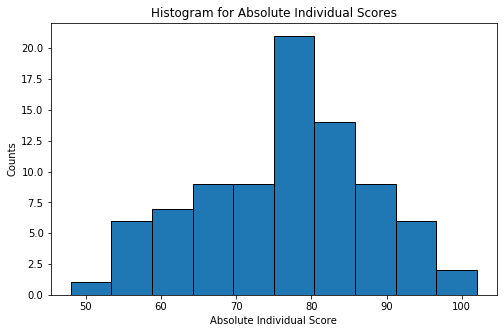

In [38]:
plt.title("Histogram for Absolute Individual Scores")
df_gap_speaker['meta.AIS'].plot.hist(edgecolor="black")
plt.xlabel("Absolute Individual Score")
plt.ylabel("Counts")
plt.show()



		Histograms and Distribution plots for AIS and AII


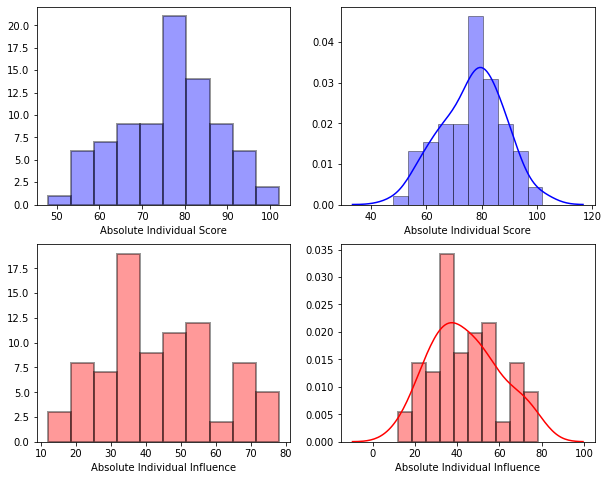

In [39]:
fig, ax = plt.subplots(2,2, figsize = (10,8))

print("\t\tHistograms and Distribution plots for AIS and AII")
sns.distplot(df_gap_speaker['meta.AIS'],kde= False, color="b",
             hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[0,0], 
             axlabel ='Absolute Individual Score', bins = 10)

sns.distplot(df_gap_speaker['meta.AIS'], kde = True, color ='b',
             hist_kws=dict(edgecolor="black"),ax = ax[0,1], 
             axlabel ='Absolute Individual Score', bins = 10)

sns.distplot(df_gap_speaker['meta.AII'], kde = False, color = 'red',
            hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[1,0], 
             axlabel ='Absolute Individual Influence', hist=True, bins = 10)

sns.distplot(df_gap_speaker['meta.AII'], kde = True, color = 'red',
            hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[1,1], 
             axlabel ='Absolute Individual Influence', hist=True, bins = 10)


plt.show()

# 1b. Similar Data visualization for Conversation dataframe

In [40]:
df_gap_convo[0:3]

,vectors,meta.Group Number,meta.Meeting Size,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,,,,
1.Pink.1,[],1,3.0,9.75,78.0,4.67,5.0,5.0,4.67,5.0,4.87
10.Orange.1,[],10,2.0,3.88,72.0,5.0,4.0,4.5,5.0,4.0,4.42
11.Pink.1,[],11,2.0,12.65,82.0,2.5,4.0,4.5,1.5,4.0,3.3


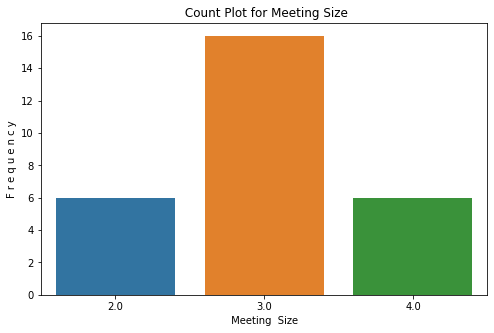

In [41]:
sns.countplot(data = df_gap_convo , x = 'meta.Meeting Size')
plt.title(" Count Plot for Meeting Size")
plt.ylabel("F r e q u e n c y")
plt.xlabel(' Meeting  Size ')
plt.show()

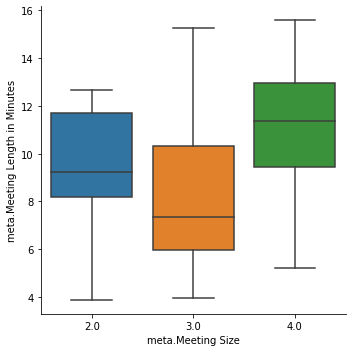

In [42]:
sns.catplot(kind = 'box', y = 'meta.Meeting Length in Minutes', x = 'meta.Meeting Size', 
            data = df_gap_convo)

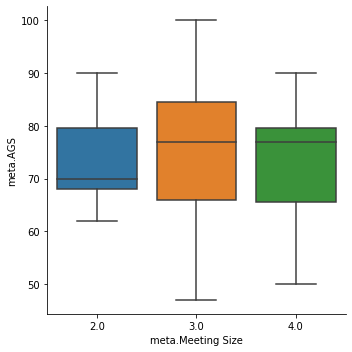

In [43]:
sns.catplot(kind = 'box', y = 'meta.AGS', x = 'meta.Meeting Size', 
            data = df_gap_convo)

		Histograms and Distribution plots for Meeting Length in Minutes and AGS


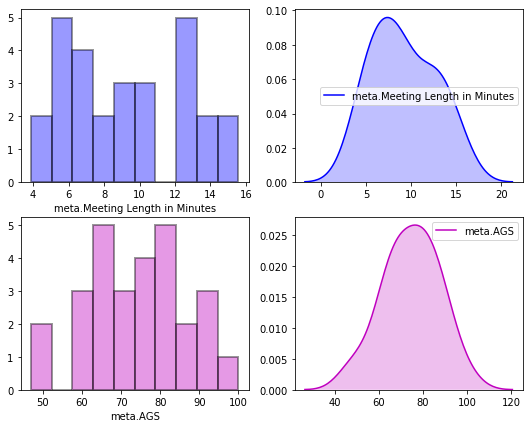

In [44]:
fig, ax = plt.subplots(2,2, figsize = (9,7))

print("\t\tHistograms and Distribution plots for Meeting Length in Minutes and AGS")

sns.distplot(df_gap_convo['meta.Meeting Length in Minutes'], kde = False, hist = True,
            color = 'b',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[0,0],
            bins = 10)

sns.kdeplot(df_gap_convo['meta.Meeting Length in Minutes'],color = 'b', 
            ax = ax[0,1], shade =True, kernel='gau')

sns.distplot(df_gap_convo['meta.AGS'], kde = False, hist = True,
            color = 'm',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[1,0],
            bins = 10)

sns.kdeplot(df_gap_convo['meta.AGS'],color = 'm', ax = ax[1,1], shade = 'm', kernel='gau')

plt.show()

### Caution if error arises either change package verison or un comment the code below

In [155]:
# fig, ax = plt.subplots(2,2, figsize = (9,7))

# print("\t\tHistograms and Distribution plots for Meeting Length in Minutes and AGS")

# sns.distplot(df_gap_convo['meta.Meeting Length in Minutes'].astype('float'), kde = False, hist = True,
#             color = 'b',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[0,0],
#             bins = 10)

# sns.kdeplot(df_gap_convo['meta.Meeting Length in Minutes'].astype('float'),color = 'b', 
#             ax = ax[0,1], shade =True, kernel='gau')

# sns.distplot(df_gap_convo['meta.AGS'].astype('float'), kde = False, hist = True,
#             color = 'm',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[1,0],
#             bins = 10)

# sns.kdeplot(df_gap_convo['meta.AGS'].astype('float'),color = 'm', ax = ax[1,1], shade = 'm', kernel='gau')

# plt.show()


# fig, ax = plt.subplots(2,2, figsize = (9,7))

# print("\t\tHistograms and Distribution plots for Meeting Length in Minutes and Group TE")

# sns.distplot(df_gap_convo['meta.Group_TE'].astype('float'), kde = False, hist = True,
#             color = 'g',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[0,0],
#             bins = 10)

# sns.kdeplot(df_gap_convo['meta.Group_TE'].astype('float'),color = 'g', 
#             ax = ax[0,1], shade =True, kernel='gau')

# sns.distplot(df_gap_convo['meta.Group_WW'].astype('float'), kde = False, hist = True,
#             color = 'orange',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[1,0],
#             bins = 10)

# sns.kdeplot(df_gap_convo['meta.Group_WW'].astype('float'),color = 'orange', ax = ax[1,1], shade = 'orange', kernel='gau')

# plt.show()

		Histograms and Distribution plots for Meeting Length in Minutes and Group TE


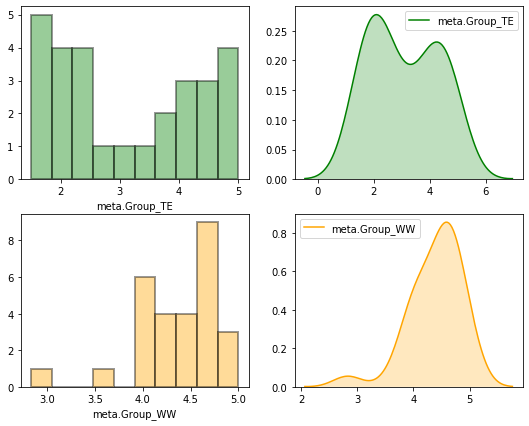

In [45]:
fig, ax = plt.subplots(2,2, figsize = (9,7))

print("\t\tHistograms and Distribution plots for Meeting Length in Minutes and Group TE")

sns.distplot(df_gap_convo['meta.Group_TE'], kde = False, hist = True,
            color = 'g',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[0,0],
            bins = 10)

sns.kdeplot(df_gap_convo['meta.Group_TE'],color = 'g', 
            ax = ax[0,1], shade =True, kernel='gau')

sns.distplot(df_gap_convo['meta.Group_WW'], kde = False, hist = True,
            color = 'orange',hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[1,0],
            bins = 10)

sns.kdeplot(df_gap_convo['meta.Group_WW'],color = 'orange', ax = ax[1,1], shade = 'orange', kernel='gau')

plt.show()

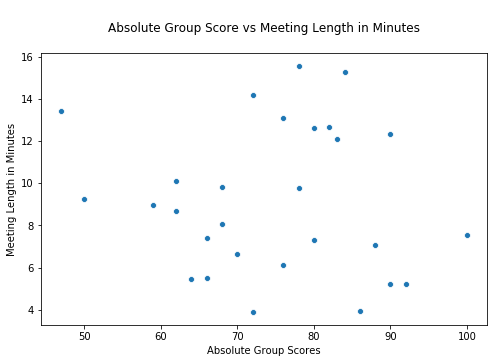

In [46]:
ax_7 = sns.scatterplot (x ="meta.AGS",  y= "meta.Meeting Length in Minutes", data = df_gap_convo)
plt.title('\nAbsolute Group Score vs Meeting Length in Minutes\n')
plt.xlabel("Absolute Group Scores")
plt.ylabel("Meeting Length in Minutes")
plt.show()

In [47]:
df_gap_convo[0:4]

,vectors,meta.Group Number,meta.Meeting Size,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,,,,
1.Pink.1,[],1,3.0,9.75,78.0,4.67,5.0,5.0,4.67,5.0,4.87
10.Orange.1,[],10,2.0,3.88,72.0,5.0,4.0,4.5,5.0,4.0,4.42
11.Pink.1,[],11,2.0,12.65,82.0,2.5,4.0,4.5,1.5,4.0,3.3
12.Blue.1,[],12,4.0,5.2,90.0,4.25,4.75,4.75,4.5,4.75,4.6


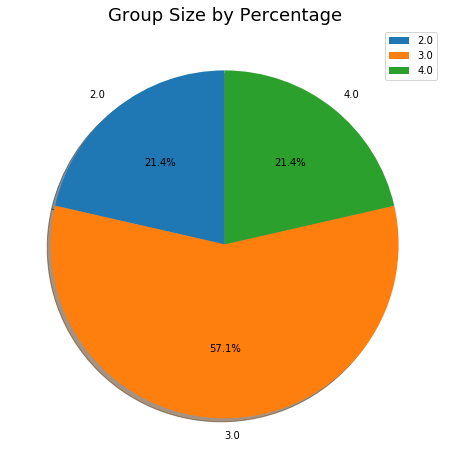

In [48]:
labels = df_gap_convo['meta.Meeting Size'].astype('category').cat.categories.tolist()
counts = df_gap_convo['meta.Meeting Size'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize = (8,8))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle = 90) 
plt.title("Group Size by Percentage", fontsize=18);
plt.legend()
plt.show()

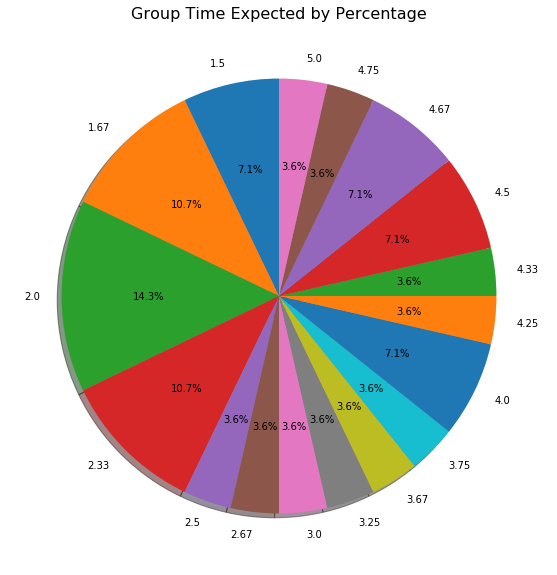

In [49]:
labels = df_gap_convo['meta.Group_TE'].astype('category').cat.categories.tolist()
counts = df_gap_convo['meta.Group_TE'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize = (10,10))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle = 90) 
plt.title("Group Time Expected by Percentage", fontsize=16);
plt.show()

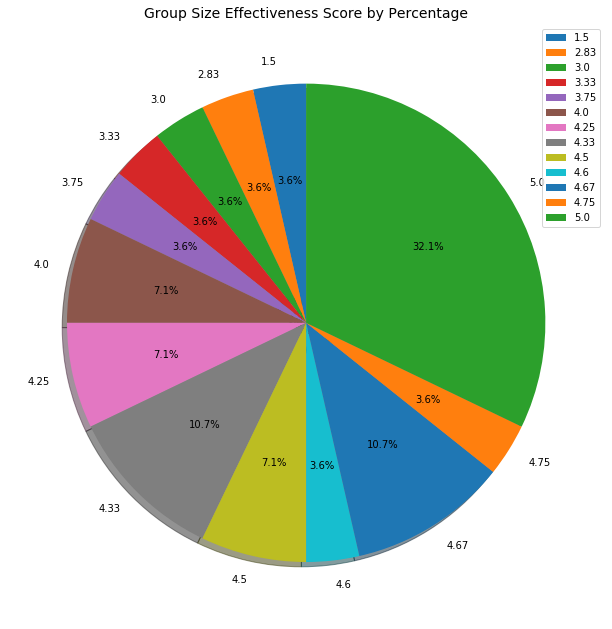

In [50]:
labels = df_gap_convo['meta.Group_Eff'].astype('category').cat.categories.tolist()
counts = df_gap_convo['meta.Group_Eff'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig, ax = plt.subplots(figsize = (11,11))

ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,startangle = 90) 
plt.title("Group Size Effectiveness Score by Percentage", fontsize=14);
plt.legend()
plt.show()

Pairplot for various features


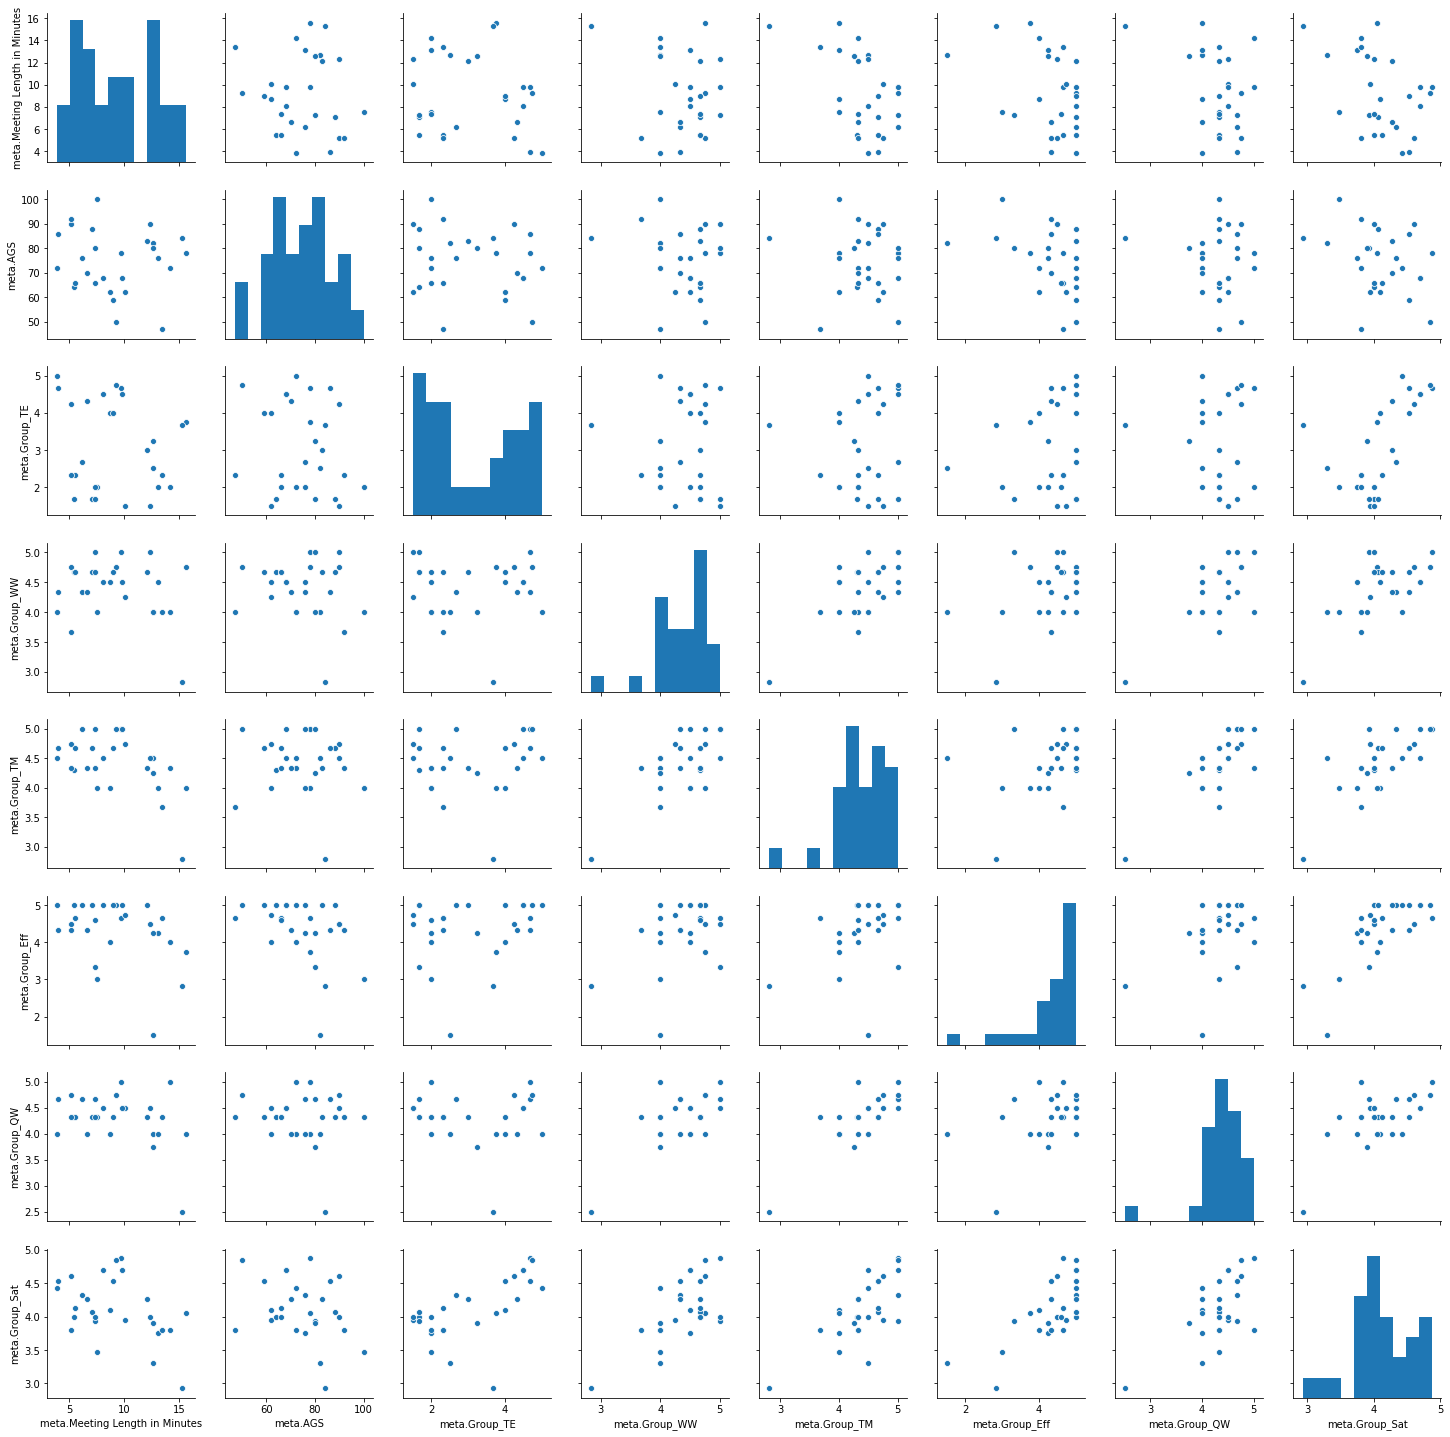

In [51]:
print("Pairplot for various features")
sns.pairplot(df_gap_convo.drop(columns = ['meta.Group Number','vectors','meta.Meeting Size']))
plt.show()


# 3. Visualization and Simlarity using Various Clustering Approach

# 3- I. Clustering for Conversational data ( Data regarding Group Performance)(Group Level Information)

## 3a. Hard Clustering ( e.g. k-means Clustering)

In [52]:
df_gap_convo[0:4]

,vectors,meta.Group Number,meta.Meeting Size,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,,,,
1.Pink.1,[],1,3.0,9.75,78.0,4.67,5.0,5.0,4.67,5.0,4.87
10.Orange.1,[],10,2.0,3.88,72.0,5.0,4.0,4.5,5.0,4.0,4.42
11.Pink.1,[],11,2.0,12.65,82.0,2.5,4.0,4.5,1.5,4.0,3.3
12.Blue.1,[],12,4.0,5.2,90.0,4.25,4.75,4.75,4.5,4.75,4.6


In [53]:
df_gap_speaker.shape

(84, 14)

In [54]:
#Dropping some features 

features_to_drop = ['vectors','meta.Group Number','meta.Meeting Size']

df_gap_convo_altered = df_gap_convo.drop(features_to_drop, axis = 1 )
df_gap_convo_altered[0:4]

,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,
1.Pink.1,9.75,78.0,4.67,5.0,5.0,4.67,5.0,4.87
10.Orange.1,3.88,72.0,5.0,4.0,4.5,5.0,4.0,4.42
11.Pink.1,12.65,82.0,2.5,4.0,4.5,1.5,4.0,3.3
12.Blue.1,5.2,90.0,4.25,4.75,4.75,4.5,4.75,4.6


In [55]:
df_gap_convo_altered.shape

(28, 8)

In [56]:
# BASIC SUMMARY STATS ARE KIND OF USELESS HERE

df_gap_convo_altered.describe()

,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
count,28.00,28.0,28.0,28.0,28.0,28.0,28.00,28.0
unique,28.00,20.0,17.0,9.0,10.0,13.0,8.00,21.0
top,9.75,78.0,2.0,4.0,5.0,5.0,4.33,3.8
freq,1.00,2.0,4.0,6.0,5.0,9.0,9.00,3.0


### Descriptive Statistics regarding Speakers (Participant Level Information) and Group Level Information

In order to get some descriptive Statistics alter the structure of the corpus data as the corpus stores variables in object form. Assign appropriate data types to these variables. First we will analyze Conversational (Group Level Information)

In [57]:
df_gap_convo_altered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1.Pink.1 to 9.Green.1
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   meta.Meeting Length in Minutes  28 non-null     object
 1   meta.AGS                        28 non-null     object
 2   meta.Group_TE                   28 non-null     object
 3   meta.Group_WW                   28 non-null     object
 4   meta.Group_TM                   28 non-null     object
 5   meta.Group_Eff                  28 non-null     object
 6   meta.Group_QW                   28 non-null     object
 7   meta.Group_Sat                  28 non-null     object
dtypes: object(8)
memory usage: 3.0+ KB


In [58]:
#Let us change the categories of data types from object 

dicti = {'meta.Meeting Length in Minutes' : float, 'meta.AGS': float, 'meta.Group_TE': float,
         'meta.Group_TM' : float, 'meta.Group_Eff': float, 'meta.Group_QW' : float,
         'meta.Group_Sat' : float, 'meta.Group_WW': float
        }

In [59]:
df_gap_convo_altered_2 = df_gap_convo_altered.astype(dicti)

In [60]:
print(df_gap_convo_altered_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1.Pink.1 to 9.Green.1
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   meta.Meeting Length in Minutes  28 non-null     float64
 1   meta.AGS                        28 non-null     float64
 2   meta.Group_TE                   28 non-null     float64
 3   meta.Group_WW                   28 non-null     float64
 4   meta.Group_TM                   28 non-null     float64
 5   meta.Group_Eff                  28 non-null     float64
 6   meta.Group_QW                   28 non-null     float64
 7   meta.Group_Sat                  28 non-null     float64
dtypes: float64(8)
memory usage: 3.0+ KB
None


In [61]:
df_gap_convo_altered_2.describe()

,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,9.182500,74.607143,3.089643,4.393214,4.423214,4.330714,4.311786,4.108929
std,3.474581,12.679348,1.199273,0.468196,0.477315,0.823020,0.473068,0.456641
min,3.880000,47.000000,1.500000,2.830000,2.800000,1.500000,2.500000,2.930000
25%,6.507500,66.000000,2.000000,4.000000,4.287500,4.187500,4.000000,3.875000
50%,8.825000,76.000000,2.835000,4.500000,4.500000,4.550000,4.330000,4.060000
75%,12.390000,83.250000,4.270000,4.670000,4.690000,5.000000,4.542500,4.447500
max,15.580000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.870000


### Co-relation between features present in Speaker and group Level Information

In [62]:
def heatMap(df_):

    # Set  the size of the heatmap.
    plt.figure(figsize = (15,10))
    # Set vmin and vmax to -1 and 1 and annot = True to see the correlation values 
    heatmap = sns.heatmap(df_.corr(), vmin=-1, vmax=1, annot=True)
    #  Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap ', fontdict={'fontsize':12}, pad = 20);
    plt.show()

**********************************************  Heat Map for Group Features ****************************************


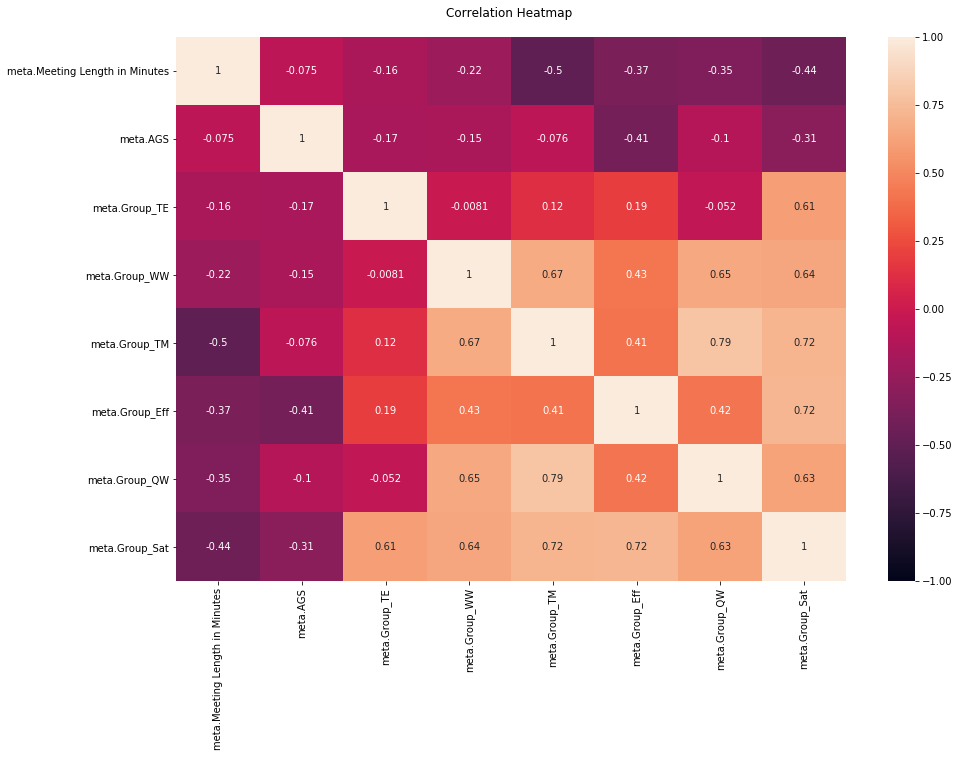

In [63]:
print("**********************************************  Heat Map for Group Features ****************************************")
heatMap(df_gap_convo_altered_2)

In [64]:
df_gap_speaker

,vectors,meta.Year at UFV,meta.Gender,meta.English,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead,meta.Group Number
id,,,,,,,,,,,,,,
1.Pink,[],4,2,1,88.0,40.0,5,5.0,5.0,5.0,5.0,5.0,5,1
1.Blue,[],1,2,1,64.0,76.0,5,5.0,5.0,5.0,5.0,5.0,2,1
1.Green,[],6,1,2,85.0,12.0,4,5.0,5.0,4.0,5.0,4.6,4,1
10.Orange,[],4,2,1,55.0,56.0,5,4.0,5.0,5.0,4.0,4.6,4,10
10.Pink,[],1,1,1,57.0,33.0,5,4.0,4.0,5.0,4.0,4.4,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.Green,[],1,2,1,84.0,34.0,4,5.0,5.0,5.0,4.0,4.6,5,8
8.Orange,[],1,2,1,78.0,36.0,4,4.0,4.0,5.0,5.0,4.4,3,8
9.Green,[],2,1,1,67.0,20.0,4,5.0,5.0,5.0,5.0,4.8,4,9


In [65]:
dicti = {'meta.AIS' : float, 'meta.AII': float, 'meta.Ind_TE': float,
         'meta.Ind_WW' : float, 'meta.Ind_WW': float, 'meta.Ind_TM' : float,
         'meta.Ind_Eff' : float, 'meta.Ind_QW': float, 'meta.Ind_Sat': float, 'meta.Ind_Lead': int
        }

df_speaker_ = gap_corpus.get_speakers_dataframe().drop(columns = ['vectors','meta.Year at UFV','meta.Gender',
                                                                'meta.English','meta.Group Number'])

df_speaker_.replace(dicti , inplace = True)

df_speaker_.describe()

,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,76.638571,43.867500,3.059524,4.398810,4.422619,4.351190,4.315476,4.109524,3.452381
std,11.194425,16.416838,1.434104,0.684509,0.778065,0.981085,0.751624,0.591021,0.974429
min,48.000000,12.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.400000,1.000000
25%,68.000000,32.000000,2.000000,4.000000,4.000000,4.000000,4.000000,3.800000,3.000000
50%,78.000000,41.500000,3.000000,4.000000,5.000000,5.000000,4.000000,4.200000,3.000000
75%,84.000000,56.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.600000,4.000000
max,102.000000,78.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [66]:
df_speaker_.corr()

,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead
meta.AIS,1.000000,-0.153930,-0.023139,0.146395,0.066356,-0.119792,0.354512,0.089823,-0.038554
meta.AII,-0.153930,1.000000,-0.080962,-0.111569,-0.284313,0.037985,-0.083960,-0.152710,-0.225068
meta.Ind_TE,-0.023139,-0.080962,1.000000,0.208719,0.063564,0.130537,0.027079,0.606292,-0.010880
meta.Ind_WW,0.146395,-0.111569,0.208719,1.000000,0.381002,0.354059,0.507730,0.679929,0.132678
meta.Ind_TM,0.066356,-0.284313,0.063564,0.381002,1.000000,0.320129,0.583043,0.636974,0.157966
meta.Ind_Eff,-0.119792,0.037985,0.130537,0.354059,0.320129,1.000000,0.305425,0.643487,-0.256406
meta.Ind_QW,0.354512,-0.083960,0.027079,0.507730,0.583043,0.305425,1.000000,0.634586,0.189373
meta.Ind_Sat,0.089823,-0.152710,0.606292,0.679929,0.636974,0.643487,0.634586,1.000000,0.025901
meta.Ind_Lead,-0.038554,-0.225068,-0.010880,0.132678,0.157966,-0.256406,0.189373,0.025901,1.000000


********************************************** Heat Map for Participants Features ****************************************


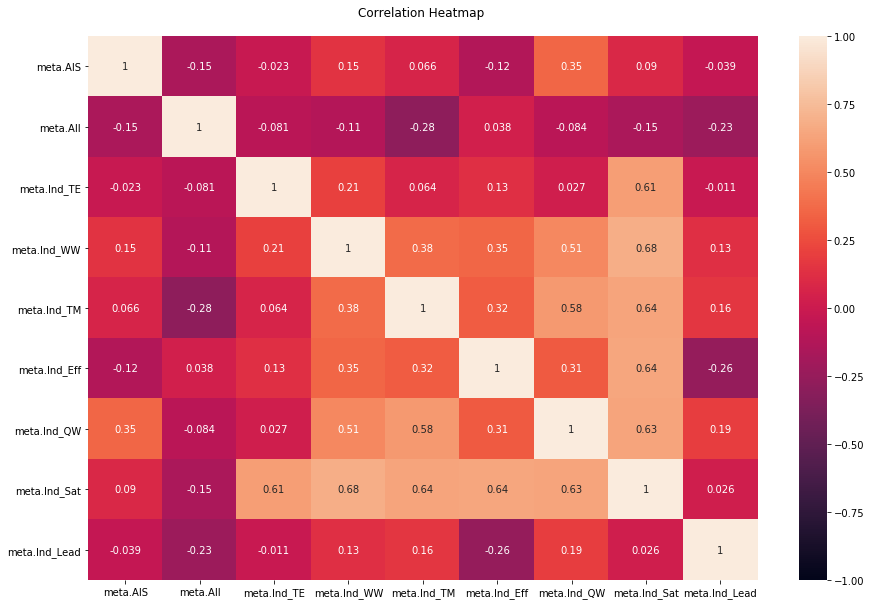

In [67]:
print("********************************************** Heat Map for Participants Features ****************************************")
heatMap(df_speaker_)

## 3 aa. Selecting Appropriate Number of Cluster Selection for group Level Data
### Random Cluster Choice Method

Randomly selectinng a value for n_cluster = 4

In [68]:
from sklearn.cluster import KMeans

# Import KMeans and set n_cluster to random number 

k_means_rand = KMeans(n_clusters = 4, init = 'k-means++')

In [157]:
k_means_rand.fit(df_gap_convo_altered_2)

KMeans(n_clusters=4)

In [70]:
# Cluster Centroid Vector values 

k_means_rand.cluster_centers_

array([[ 7.448     , 65.7       ,  3.383     ,  4.476     ,  4.505     ,
         4.735     ,  4.282     ,  4.28      ],
       [ 6.88166667, 91.        ,  2.73666667,  4.40333333,  4.48666667,
         4.27666667,  4.485     ,  4.07833333],
       [11.335     , 48.5       ,  3.54      ,  4.375     ,  4.335     ,
         4.835     ,  4.54      ,  4.325     ],
       [11.867     , 78.9       ,  2.918     ,  4.308     ,  4.321     ,
         3.858     ,  4.192     ,  3.913     ]])

In [71]:
print (k_means_rand.labels_)

[3 0 3 1 0 0 3 0 3 3 1 0 3 3 0 1 2 1 1 0 3 0 1 3 2 3 0 0]


In [72]:
label_series = pd.Series(k_means_rand.labels_)
display(label_series[0:5])

0    3
1    0
2    3
3    1
4    0
dtype: int32

In [73]:
print(" \n---------------------- DataFrame for Cluster Counts-------------------------")
display(pd.DataFrame(label_series.value_counts(), columns = ['Frequency']))

 
---------------------- DataFrame for Cluster Counts-------------------------


,Frequency
3,10
0,10
1,6
2,2


In [74]:
pd.concat([df_gap_convo_altered_2, pd.Series(k_means_rand.labels_)], axis = 0)

,0,meta.AGS,meta.Group_Eff,meta.Group_QW,meta.Group_Sat,meta.Group_TE,meta.Group_TM,meta.Group_WW,meta.Meeting Length in Minutes
1.Pink.1,NaN,78.0,4.67,5.00,4.87,4.67,5.00,5.00,9.75
10.Orange.1,NaN,72.0,5.00,4.00,4.42,5.00,4.50,4.00,3.88
11.Pink.1,NaN,82.0,1.50,4.00,3.30,2.50,4.50,4.00,12.65
12.Blue.1,NaN,90.0,4.50,4.75,4.60,4.25,4.75,4.75,5.20
13.Yellow.1,NaN,62.0,4.00,4.00,4.10,4.00,4.00,4.50,8.67
14.Red.1,NaN,62.0,4.75,4.50,3.95,1.50,4.75,4.25,10.10
15.Orange.1,NaN,78.0,3.75,4.00,4.05,3.75,4.00,4.75,15.58
16.Yellow.1,NaN,64.0,5.00,4.33,4.00,1.67,4.30,4.67,5.46
17.Orange.1,NaN,76.0,4.25,4.00,3.75,2.00,4.00,4.50,13.10
18.Pink.1,NaN,84.0,2.83,2.50,2.93,3.67,2.80,2.83,15.27


Notice the concatenation is not quite right because row ids have a unique ids. To 
fix this get the unique row id from the original df_gap_convo. Another approach to remap
row numbers to 0,1,2 ...etc. However doing so will destroy data's properties which help to 
us identify speaker and utterances as they can be inter-changed  easily.



In [75]:
# get row's ids as a list from df_gap_convo_altered_2

index_labels = list(df_gap_convo_altered_2.index)
print(index_labels)

['1.Pink.1', '10.Orange.1', '11.Pink.1', '12.Blue.1', '13.Yellow.1', '14.Red.1', '15.Orange.1', '16.Yellow.1', '17.Orange.1', '18.Pink.1', '19.Blue.1', '2.Pink.1', '20.Blue.1', '21.Blue.1', '22.Blue.1', '23.Orange.1', '24.Blue.1', '25.Pink.1', '26.Pink.1', '27.Pink.1', '28.Blue.1', '3.Green.1', '4.Blue.1', '5.Orange.1', '6.Blue.1', '7.Orange.1', '8.Blue.1', '9.Green.1']


In [76]:
# Update label_series such that ids appear as row names

label_series = pd.Series(k_means_rand.labels_, index = index_labels, name ='Cluster Number')

display(label_series[0:4])

1.Pink.1       3
10.Orange.1    0
11.Pink.1      3
12.Blue.1      1
Name: Cluster Number, dtype: int32

In [77]:
#Now concatenate it 

temp_df = pd.concat([df_gap_convo_altered_2, label_series], axis = 1)

In [78]:
temp_df

,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat,Cluster Number
1.Pink.1,9.75,78.0,4.67,5.00,5.00,4.67,5.00,4.87,3
10.Orange.1,3.88,72.0,5.00,4.00,4.50,5.00,4.00,4.42,0
11.Pink.1,12.65,82.0,2.50,4.00,4.50,1.50,4.00,3.30,3
12.Blue.1,5.20,90.0,4.25,4.75,4.75,4.50,4.75,4.60,1
13.Yellow.1,8.67,62.0,4.00,4.50,4.00,4.00,4.00,4.10,0
14.Red.1,10.10,62.0,1.50,4.25,4.75,4.75,4.50,3.95,0
15.Orange.1,15.58,78.0,3.75,4.75,4.00,3.75,4.00,4.05,3
16.Yellow.1,5.46,64.0,1.67,4.67,4.30,5.00,4.33,4.00,0
17.Orange.1,13.10,76.0,2.00,4.50,4.00,4.25,4.00,3.75,3
18.Pink.1,15.27,84.0,3.67,2.83,2.80,2.83,2.50,2.93,3


## PCA (PRINCIPAL COMPONENT ANALYSIS)

Before we can do anything, let us reduce the dimensionality of the data.

In [79]:
df_gap_convo_altered_2[0:4]

,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,
1.Pink.1,9.75,78.0,4.67,5.00,5.00,4.67,5.00,4.87
10.Orange.1,3.88,72.0,5.00,4.00,4.50,5.00,4.00,4.42
11.Pink.1,12.65,82.0,2.50,4.00,4.50,1.50,4.00,3.30
12.Blue.1,5.20,90.0,4.25,4.75,4.75,4.50,4.75,4.60


Generally for Visualizing clusters a scatter plot used . However for KMeans Clustering, Visualizing Multidimension data (using features > 2) will be highly difficult. Hence techniques will PCA (Principal Component Analysis in conjuction with KMEANS can be used. This will be demonstrated shortly.

### Standardization of Data ####

In [80]:
#Scaling data using Standard Scaler

sc = StandardScaler()

In [81]:
scaled_data = sc.fit_transform(df_gap_convo_altered_2)
pd.DataFrame(scaled_data)[0:4]

,0,1,2,3,4,5,6,7
0,0.166326,0.272500,1.341944,1.319789,1.230570,0.419809,1.481486,1.697257
1,-1.554087,-0.209394,1.622160,-0.855261,0.163822,0.828129,-0.671166,0.693717
2,1.016275,0.593762,-0.500689,-0.855261,0.163822,-3.502536,-0.671166,-1.803983
3,-1.167214,1.236287,0.985305,0.776027,0.697196,0.209463,0.943323,1.095133


In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5 )

In [83]:
pca_data = pca.fit_transform(scaled_data)

#display data in a dataframe
pd.DataFrame(pca_data)[0:4]

,0,1,2,3,4
0,-2.741798,-0.084602,-0.383955,1.596541,-0.209844
1,-0.838581,-1.685319,-1.700899,-0.967307,0.142320
2,3.146702,1.378457,-0.343839,1.518624,1.959076
3,-1.889511,0.510418,-1.642653,0.477164,-0.352864


In [84]:
# Store above data frame 

pca_df = pd.DataFrame(pca_data, index = index_labels)

In [85]:
pca_df = pca_df.rename({0:'Component 0', 1:'Component 1', 2:'Component 2',
                        3:'Component 3', 4:'Component 4'}, axis = 1)
pca_df.head()

,Component 0,Component 1,Component 2,Component 3,Component 4
1.Pink.1,-2.741798,-0.084602,-0.383955,1.596541,-0.209844
10.Orange.1,-0.838581,-1.685319,-1.700899,-0.967307,0.142320
11.Pink.1,3.146702,1.378457,-0.343839,1.518624,1.959076
12.Blue.1,-1.889511,0.510418,-1.642653,0.477164,-0.352864
13.Yellow.1,0.416884,-1.265654,0.137690,0.051090,0.403291


In [86]:
pca_df.shape

(28, 5)

In [87]:
pca.components_

array([[ 0.28444867,  0.15268792, -0.16111566, -0.38758731, -0.43728167,
        -0.36998149, -0.40688515, -0.47532735],
       [-0.11709679,  0.49300726, -0.61988873,  0.24081759,  0.26294667,
        -0.24260576,  0.33888721, -0.24110989],
       [ 0.5268231 , -0.60618905, -0.46872067,  0.25388827, -0.07720447,
         0.18280475,  0.13529154, -0.11468232],
       [ 0.64226115,  0.21466861,  0.40949471,  0.3179594 ,  0.13745039,
        -0.45512745,  0.12531298,  0.17577529],
       [-0.25573716, -0.54308262,  0.07355813, -0.2588824 ,  0.32651078,
        -0.62720806,  0.21810829, -0.14020845]])

In [88]:
# Display Variance

pd.DataFrame(pca.explained_variance_ratio_ , columns = ['Variance '])

,Variance
0,0.481640
1,0.174742
2,0.134145
3,0.090737
4,0.057006


In [89]:
0.481640 + 0.174742 + 0.134145 

0.790527

#### Genric Function for above steps

In [90]:
def standardPCA(features):
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    
    
    sc = StandardScaler()
    
    scaledata_ = sc.fit_transform(features)
    
    scaled_data = sc.fit_transform(features)
    
    
    pca = PCA(n_components = 5)
    pca_data = pca.fit_transform(scaled_data)
    
    pca_df = pd.DataFrame(pca_data, index = feature.index)
    
    pca_df = pca_df.rename({0:'Component 0', 1:'Component 1', 2:'Component 2',
                        3:'Component 3', 4:'Component 4'}, axis = 1)
    
    
    return pca.components_, pd.DataFrame(pca.explained_variance_ratio_), pca_df
    


## 3ab. WCSS Method for Cluster Selection (Elbow Method)

WCSS is the sum of squared distance between each point and the centroid in a cluster. WCSS is inversely propotional to the number of cluster. As the number of clusters increase , WCSS will decrease. At n_cluster = 1, WCSS is the largest. The Elbow method will help us to roughly calculate optimal number of clusters. Other clustering methods such has Hierarchical Clustering, can also help us to determine the optimal cluster value. Other methods Silhouette Clustering can also be used to check the cohesion between the cluster itself.

##### Caution if using different sklearn version than recommend error might arise while plotting WCSS plot. Either downgrade to the version mentioned above or change the range for the loop below from 2 to 10 instead of 1 to 10 for all the instances

In [91]:
wcss_values = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(pca_df.drop(columns = ['Component 3','Component 4']))
    wcss_values.append(kmeans.inertia_)
print(wcss_values)    

C:\Users\pulki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


[177.07795776637408, 112.88791846646744, 74.51720826490839, 54.96939623440675, 39.519912850527845, 30.62999050417222, 25.911158208987285, 20.99164069786579, 18.48691975660049]


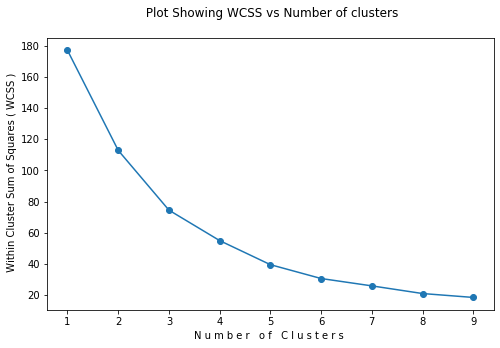

In [92]:
# Plot WCSS

plt.plot(range(1,10), wcss_values, marker = 'o')
plt.ylabel(" Within Cluster Sum of Squares ( WCSS )")
plt.xlabel("N u m b e r   o f   C l u s t e r s ")
plt.title(" Plot Showing WCSS vs Number of clusters\n")
plt.show()


 Graph shows n_cluters value or  4 or 5  will give an optimal result

Generic Function for Wcss plot 

In [93]:
def WccsPlot(pcafeatures_ , dropfeatures_):
    
    from sklearn.clusters import KMeans
    
    wcss_values = []

    for i in range(1,12):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(pcafeatures_.drop(columns = dropfeature_))
        wcss_values.append(kmeans.inertia_)
    
    print(wcss_values)  
    
    plt.plot(range(1,12),wcss_values, marker = 'o')
    plt.ylabel(" Within Cluster Sum of Squares ( WCSS )")
    plt.xlabel("N u m b e r   o f   C l u s t e r s ")
    plt.title(" Plot Showing WCSS vs Number of clusters\n")
    plt.show()


### Perform K-MEANS Clustering using new Data features extracted from PCA

In [94]:
# Use Kmeans using n_clusters = 4. 

kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++')

# Fit pca data. As we are using only first 3 components (maximized our variance) . These 3 components record for 80% of 
# variance in the data

kmeans_pca.fit(pca_df.drop(columns = ['Component 3','Component 4']))

KMeans(n_clusters=4)

In [95]:
kmeans_fit = kmeans_pca.fit(pca_df.drop(columns = ['Component 3','Component 4']))


In [96]:
# lables_ stores information regarding cluster number an observation belongs

kmeans_pca.labels_ 

array([0, 0, 2, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0,
       0, 1, 0, 1, 0, 0])

In [97]:
# Count of labels using unique method provided by numpy. The labels can be converted to Series 
# and then value_counts() can also be used

unique ,counts = np.unique(kmeans_pca.labels_ , return_counts = True)

# Using dictionary to keep count of cluster labels 
count_dict = dict(zip(unique,counts))

#Display as dataframe
pd.DataFrame(count_dict.items(), columns = ['Cluster number' , 'Frequency' ])

,Cluster number,Frequency
0,0,10
1,1,14
2,2,3
3,3,1


In [98]:
print(index_labels)

['1.Pink.1', '10.Orange.1', '11.Pink.1', '12.Blue.1', '13.Yellow.1', '14.Red.1', '15.Orange.1', '16.Yellow.1', '17.Orange.1', '18.Pink.1', '19.Blue.1', '2.Pink.1', '20.Blue.1', '21.Blue.1', '22.Blue.1', '23.Orange.1', '24.Blue.1', '25.Pink.1', '26.Pink.1', '27.Pink.1', '28.Blue.1', '3.Green.1', '4.Blue.1', '5.Orange.1', '6.Blue.1', '7.Orange.1', '8.Blue.1', '9.Green.1']


In [99]:
temp_df = pd.concat([df_gap_convo_altered_2, 
                     pca_df.drop(columns = ['Component 3','Component 4']),
                    pd.Series(kmeans_pca.labels_ , index = index_labels, name = 'Cluster Number')],
                    axis = 1)
display(temp_df)

,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat,Component 0,Component 1,Component 2,Cluster Number
1.Pink.1,9.75,78.0,4.67,5.00,5.00,4.67,5.00,4.87,-2.741798,-0.084602,-0.383955,0
10.Orange.1,3.88,72.0,5.00,4.00,4.50,5.00,4.00,4.42,-0.838581,-1.685319,-1.700899,0
11.Pink.1,12.65,82.0,2.50,4.00,4.50,1.50,4.00,3.30,3.146702,1.378457,-0.343839,2
12.Blue.1,5.20,90.0,4.25,4.75,4.75,4.50,4.75,4.60,-1.889511,0.510418,-1.642653,0
13.Yellow.1,8.67,62.0,4.00,4.50,4.00,4.00,4.00,4.10,0.416884,-1.265654,0.137690,1
14.Red.1,10.10,62.0,1.50,4.25,4.75,4.75,4.50,3.95,-0.233105,0.511268,1.445543,1
15.Orange.1,15.58,78.0,3.75,4.75,4.00,3.75,4.00,4.05,1.180063,-0.504791,0.619437,1
16.Yellow.1,5.46,64.0,1.67,4.67,4.30,5.00,4.33,4.00,-0.571458,0.401816,0.864376,1
17.Orange.1,13.10,76.0,2.00,4.50,4.00,4.25,4.00,3.75,1.488068,0.302549,1.082169,1
18.Pink.1,15.27,84.0,3.67,2.83,2.80,2.83,2.50,2.93,6.899086,-2.109207,-0.909816,3


In [100]:
kmeans_pca.labels_

array([0, 0, 2, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0,
       0, 1, 0, 1, 0, 0])

In [101]:
pca_df.drop(columns = ['Component 3','Component 4']).head()

,Component 0,Component 1,Component 2
1.Pink.1,-2.741798,-0.084602,-0.383955
10.Orange.1,-0.838581,-1.685319,-1.700899
11.Pink.1,3.146702,1.378457,-0.343839
12.Blue.1,-1.889511,0.510418,-1.642653
13.Yellow.1,0.416884,-1.265654,0.137690


### 2D  Cluster Plot for K-Means clustering on Group Level Information

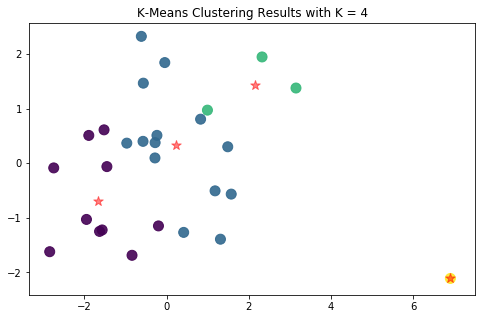

In [102]:
plt.scatter(temp_df['Component 0'], temp_df['Component 1'], 
            s=100, c=kmeans_pca.labels_, alpha = 0.90) 
plt.title('K-Means Clustering Results with K = 4')
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1], 
            marker='*', s=100, c='r', alpha = 0.5);

### 3D Cluster Plot for K-Means clustering on Group Level Information

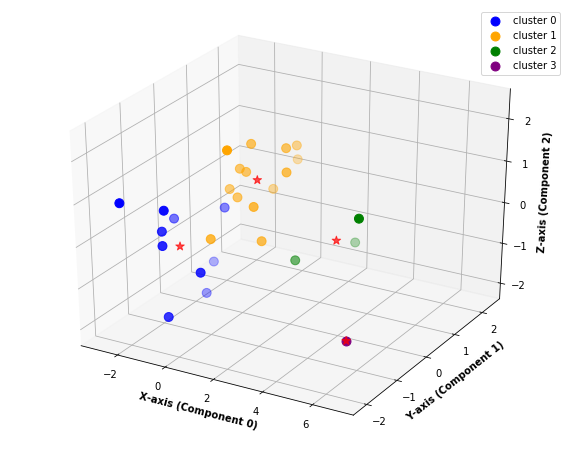

In [103]:
y_clusters = kmeans_pca.labels_  
x = pca_df.drop(columns = ['Component 3','Component 4']).values

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 80 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 80 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 80 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 80 , color = 'purple', label = "cluster 3")
ax.scatter(kmeans_pca.cluster_centers_[:,0], 
             kmeans_pca.cluster_centers_[:,1],
             kmeans_pca.cluster_centers_[:,2] , marker='*', s = 80, c=['red'], alpha = 0.7)
ax.set_xlabel('X-axis (Component 0)', fontweight ='bold')
ax.set_ylabel('Y-axis (Component 1)', fontweight ='bold')
ax.set_zlabel('Z-axis (Component 2)', fontweight ='bold')
ax.legend()
plt.show()

## 3b. Soft Clustering ( Fuzzy Clustering ) using  C-Means

In [104]:
# Recall our PCA data

pca_df[0:5]

,Component 0,Component 1,Component 2,Component 3,Component 4
1.Pink.1,-2.741798,-0.084602,-0.383955,1.596541,-0.209844
10.Orange.1,-0.838581,-1.685319,-1.700899,-0.967307,0.142320
11.Pink.1,3.146702,1.378457,-0.343839,1.518624,1.959076
12.Blue.1,-1.889511,0.510418,-1.642653,0.477164,-0.352864
13.Yellow.1,0.416884,-1.265654,0.137690,0.051090,0.403291


In [105]:
from fcmeans import FCM

fcm = FCM(n_clusters = 4)
fcm.fit((pca_df.drop(columns = ['Component 3','Component 4'])).values)


In [106]:
fcm_labels = fcm.predict((pca_df.drop(columns = ['Component 3','Component 4'])).values)

In [107]:
fcm_labels

array([0, 0, 3, 0, 1, 2, 1, 2, 1, 3, 2, 0, 2, 2, 2, 2, 1, 3, 3, 2, 2, 0,
       0, 1, 0, 2, 0, 0], dtype=int64)

In [108]:
fcm_centers = fcm.centers
fcm_centers

array([[-1.70995629, -0.8475434 , -0.37017207],
       [ 1.19655531, -0.46430543,  0.51079387],
       [-0.43223676,  0.6217528 ,  0.48711062],
       [ 2.82392033,  1.18593617, -0.76126565]])

In [109]:
unique ,counts = np.unique(fcm_labels , return_counts = True)

# Using dictionary to keep count of cluster labels 
count_dict = dict(zip(unique,counts))

#Display as dataframe
pd.DataFrame(count_dict.items(), columns = ['Cluster number' , 'Frequency' ])

,Cluster number,Frequency
0,0,9
1,1,5
2,2,10
3,3,4


### 2D  Cluster Plot for C-Means clustering on Group Level Information

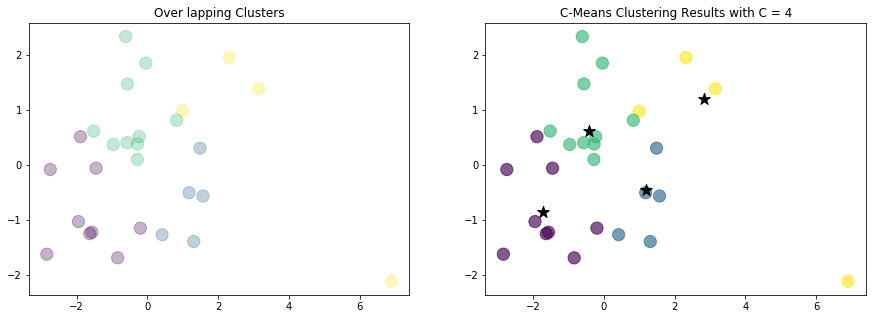

In [110]:
X = (pca_df.drop(columns = ['Component 3','Component 4'])).values

f, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.3, c = fcm_labels, s=150)
axes[0].title.set_text("Over lapping Clusters")
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=0.65, s = 150)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=150, c='black', label = 'centroid')
plt.title('C-Means Clustering Results with C = 4')
plt.show()

### 3D  Cluster Plot for C-Means clustering on Group Level Information

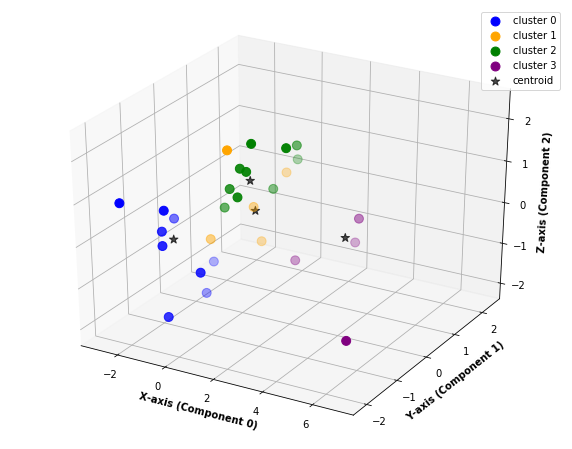

In [111]:
y_clusters = fcm_labels
x = pca_df.drop(columns = ['Component 3','Component 4']).values

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 80 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 80 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 80 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 80 , color = 'purple', label = "cluster 3")
ax.scatter(fcm_centers [:,0], fcm_centers [:,1],
             fcm_centers [:,2], marker='*', s = 80, c=['black'], alpha = 0.7, label = 'centroid')
ax.set_xlabel('X-axis (Component 0)', fontweight ='bold')
ax.set_ylabel('Y-axis (Component 1)', fontweight ='bold')
ax.set_zlabel('Z-axis (Component 2)', fontweight ='bold')
ax.legend()
plt.show()

## 3c. Hierarchical Clustering using 8 features

For hierarchical Clustering instead of using data obtained from PCA use the original data which comprises of 8 features

In [112]:
df_gap_convo_altered_2.head()

,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,
1.Pink.1,9.75,78.0,4.67,5.00,5.00,4.67,5.00,4.87
10.Orange.1,3.88,72.0,5.00,4.00,4.50,5.00,4.00,4.42
11.Pink.1,12.65,82.0,2.50,4.00,4.50,1.50,4.00,3.30
12.Blue.1,5.20,90.0,4.25,4.75,4.75,4.50,4.75,4.60
13.Yellow.1,8.67,62.0,4.00,4.50,4.00,4.00,4.00,4.10


In [113]:
label_ = df_gap_convo_altered_2.index

In [114]:
label_

Index(['1.Pink.1', '10.Orange.1', '11.Pink.1', '12.Blue.1', '13.Yellow.1',
       '14.Red.1', '15.Orange.1', '16.Yellow.1', '17.Orange.1', '18.Pink.1',
       '19.Blue.1', '2.Pink.1', '20.Blue.1', '21.Blue.1', '22.Blue.1',
       '23.Orange.1', '24.Blue.1', '25.Pink.1', '26.Pink.1', '27.Pink.1',
       '28.Blue.1', '3.Green.1', '4.Blue.1', '5.Orange.1', '6.Blue.1',
       '7.Orange.1', '8.Blue.1', '9.Green.1'],
      dtype='object', name='id')

### Dendrogram for Hierarchical Clustering

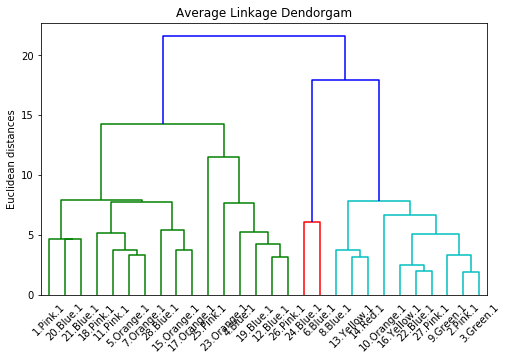

In [115]:
dendo_mean = sch.dendrogram(sch.linkage(df_gap_convo_altered_2 , method = 'average'), labels = label_)
plt.title("Average Linkage Dendorgam")
plt.ylabel('Euclidean distances')
plt.show()

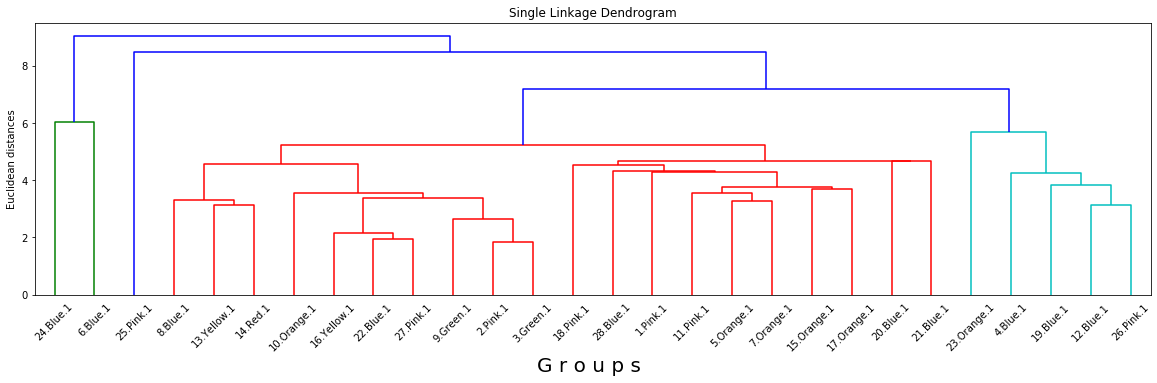

In [116]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (20,5)
dendrogram = sch.dendrogram(sch.linkage(df_gap_convo_altered_2 , method='single'), labels = label_ )
plt.title('Single Linkage Dendrogram')
plt.xlabel('G r o u p s ', fontsize = 20)
plt.ylabel('Euclidean distances')
plt.show()


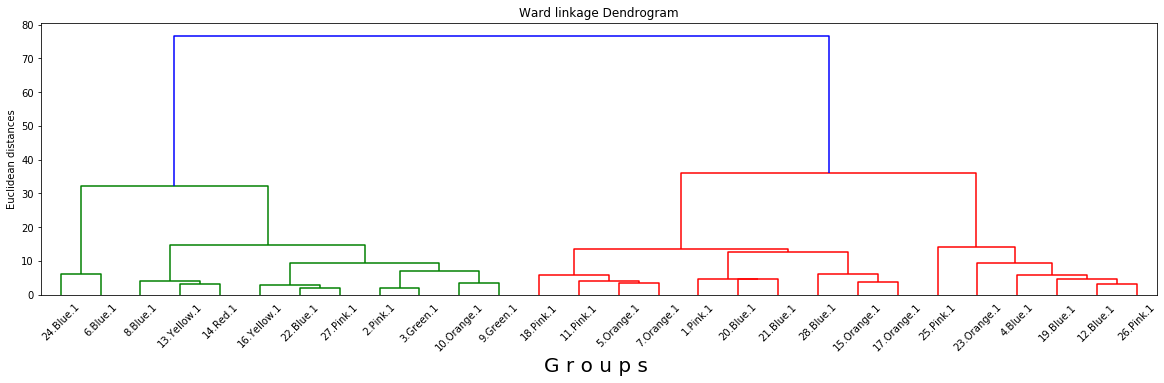

In [117]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (20,5)
dendrogram = sch.dendrogram(sch.linkage(df_gap_convo_altered_2 , method='ward'), labels = label_ )
plt.title('Ward linkage Dendrogram')
plt.xlabel('G r o u p s ', fontsize = 20)
plt.ylabel('Euclidean distances')
plt.show()


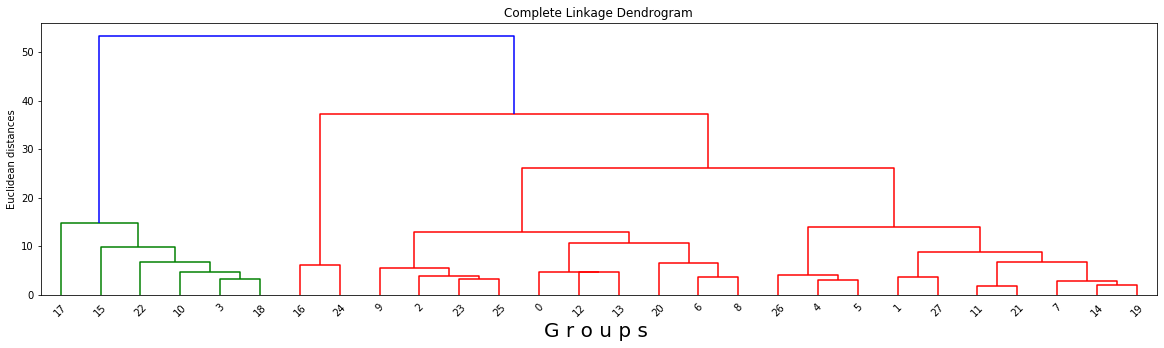

In [118]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (20,5)
dendrogram = sch.dendrogram(sch.linkage(df_gap_convo_altered_2 , method='complete'))
plt.title('Complete Linkage Dendrogram')
plt.xlabel('G r o u p s ', fontsize = 20)
plt.ylabel('Euclidean distances')
plt.show()


# 3- II. Clustering for Speaker data (Participant Level Information)

## Review Utterance, Conversation, Speaker Data Structure

In [119]:
df_gap_speaker[0:5]

,vectors,meta.Year at UFV,meta.Gender,meta.English,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead,meta.Group Number
id,,,,,,,,,,,,,,
1.Pink,[],4,2,1,88.0,40.0,5,5.0,5.0,5.0,5.0,5.0,5,1
1.Blue,[],1,2,1,64.0,76.0,5,5.0,5.0,5.0,5.0,5.0,2,1
1.Green,[],6,1,2,85.0,12.0,4,5.0,5.0,4.0,5.0,4.6,4,1
10.Orange,[],4,2,1,55.0,56.0,5,4.0,5.0,5.0,4.0,4.6,4,10
10.Pink,[],1,1,1,57.0,33.0,5,4.0,4.0,5.0,4.0,4.4,3,10


In [120]:
gap_corpus.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.End,meta.Duration,meta.Sentiment,meta.Decision,meta.Private,meta.Survival Item,vectors
id,,,,,,,,,,,,
1.Pink.1,00:02.0,"""So what did everyone do as one""",1.Pink,None,1.Pink.1,00:03.5,00:01.5,NaN,NaN,NaN,NaN,[]
1.Blue.1,00:04.0,"""I did uh cigarette lighter""",1.Blue,1.Pink.1,1.Pink.1,00:05.7,00:01.7,NaN,NaN,Private,Cigarette Lighter,[]
1.Blue.2,00:06.4,"""For one""",1.Blue,1.Blue.1,1.Pink.1,00:07.2,00:00.7,NaN,NaN,Private,Cigarette Lighter,[]
1.Pink.2,00:07.3,"""Mm okay I did knife""",1.Pink,1.Blue.2,1.Pink.1,00:09.3,00:02.1,NaN,NaN,Private,Knife,[]
1.Green.1,00:09.4,"""Knife""",1.Green,1.Pink.2,1.Pink.1,00:09.9,00:00.6,NaN,NaN,NaN,Knife,[]


In [121]:
gap_corpus.get_conversations_dataframe().head()

,vectors,meta.Group Number,meta.Meeting Size,meta.Meeting Length in Minutes,meta.AGS,meta.Group_TE,meta.Group_WW,meta.Group_TM,meta.Group_Eff,meta.Group_QW,meta.Group_Sat
id,,,,,,,,,,,
1.Pink.1,[],1,3.0,9.75,78.0,4.67,5.0,5.0,4.67,5.0,4.87
10.Orange.1,[],10,2.0,3.88,72.0,5.0,4.0,4.5,5.0,4.0,4.42
11.Pink.1,[],11,2.0,12.65,82.0,2.5,4.0,4.5,1.5,4.0,3.3
12.Blue.1,[],12,4.0,5.2,90.0,4.25,4.75,4.75,4.5,4.75,4.6
13.Yellow.1,[],13,2.0,8.67,62.0,4.0,4.5,4.0,4.0,4.0,4.1


In [122]:
gap_corpus.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.End,meta.Duration,meta.Sentiment,meta.Decision,meta.Private,meta.Survival Item,vectors
id,,,,,,,,,,,,
1.Pink.1,00:02.0,"""So what did everyone do as one""",1.Pink,None,1.Pink.1,00:03.5,00:01.5,NaN,NaN,NaN,NaN,[]
1.Blue.1,00:04.0,"""I did uh cigarette lighter""",1.Blue,1.Pink.1,1.Pink.1,00:05.7,00:01.7,NaN,NaN,Private,Cigarette Lighter,[]
1.Blue.2,00:06.4,"""For one""",1.Blue,1.Blue.1,1.Pink.1,00:07.2,00:00.7,NaN,NaN,Private,Cigarette Lighter,[]
1.Pink.2,00:07.3,"""Mm okay I did knife""",1.Pink,1.Blue.2,1.Pink.1,00:09.3,00:02.1,NaN,NaN,Private,Knife,[]
1.Green.1,00:09.4,"""Knife""",1.Green,1.Pink.2,1.Pink.1,00:09.9,00:00.6,NaN,NaN,NaN,Knife,[]


## 3-II a. Participant's Average TF- IDF 

Approach: To compute average TF-IDF for each participants, TF-IDF for each participant was computed. This was done by using utterance level information and the associated with each speaker. Notice the above utterance dataframe has speaker attribute. This speaker attribute associates an utterance with a speaker. To calculate an average TF-IDF compute TF-IDF for each utterance, aggregate the utterance according to the speaker and then use average function to provide an average score of each participant vector.  Following steps can be used to achieve this

To calculate TF-IDF vector, import the TF-IDF Transformer provided in sklearn. For this experiment, all stops words were removed. To use TF-IDF however CountVectorizer Transformer needs to be used first. The default tokenization in CountVectorizer removes all special characters, punctuation and single characters. Convokit's TF-IDF Transformer cam also be used instead (similar to Part 1 of the project) . The feature vmatrix has a total vocabulary of 1477 unique words  

In [123]:
# Create a list to store text attribute of the utterance 
lst= []

# Create a list to store corresponding utterance id of the text in a separate list
id_list = []

for utt in gap_corpus.iter_utterances():
    lst.append(utt.text.lower())
    id_list.append(utt.id)
print("***Utterance text***\n")
print(lst[0:3])


# Import required libraries
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

#Use CountVectorizer for tokenization and to count the number of words
vectorizer = CountVectorizer(stop_words='english',analyzer='word')
document_term_matrix = vectorizer.fit_transform(lst)
document_term_matrix.shape

#Use TF-IDF Transformer on the matrix obtained by using CountVectorizer Transformer
tfidf_transformer = TfidfTransformer()
tf_idf = tfidf_transformer.fit_transform(document_term_matrix )

# As our matrix contains only numeric values with for better visual representation get the vocabulary and make them
# as column values
kl = list(vectorizer.vocabulary_.keys())
len(kl)
means = np.mean(tf_idf, axis=0)


#TF-IDF matrix as dataframe
x = pd.DataFrame(tf_idf.toarray() ,columns = kl, index = id_list )
x

***Utterance text***

['"so what did everyone do as one"', '"i did uh cigarette lighter"', '"for one"']


,did,uh,cigarette,lighter,mm,okay,knife,think,um,pretty,...,leaving,divergence,default,vote,skil,equally,broke,free,em,disposition
1.Pink.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.Blue.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.Blue.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.Pink.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.Green.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.Blue.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.Green.114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.Pink.102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.Green.115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
len(kl)

1477

Combine the vector matrix with the correposnding speaker information. This can be achieved easily, just extract the speakers and concatenate it with matrix obtained. 

In [125]:
g_= gap_corpus.get_utterances_dataframe()

In [126]:
#Filter out speaker information
g_['speaker']

id
1.Pink.1        1.Pink
1.Blue.1        1.Blue
1.Blue.2        1.Blue
1.Pink.2        1.Pink
1.Green.1      1.Green
                ...   
9.Blue.47       9.Blue
9.Green.114    9.Green
9.Pink.102      9.Pink
9.Green.115    9.Green
9.Pink.103      9.Pink
Name: speaker, Length: 8009, dtype: object

In [127]:
X_ = pd.concat([x , pd.Series(g_['speaker'])], axis = 1 )

In [128]:
X_

,did,uh,cigarette,lighter,mm,okay,knife,think,um,pretty,...,divergence,default,vote,skil,equally,broke,free,em,disposition,speaker
1.Pink.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.Pink
1.Blue.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.Blue
1.Blue.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.Blue
1.Pink.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.Pink
1.Green.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.Blue.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.Blue
9.Green.114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.Green
9.Pink.102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.Pink
9.Green.115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.Green


In [129]:
X_['speaker'].value_counts()

23.Orange    232
24.Blue      227
13.Yellow    225
15.Purple    215
18.Pink      207
            ... 
16.Pink       21
12.Green      18
14.Pink       15
14.Yellow     13
17.Yellow      6
Name: speaker, Length: 84, dtype: int64

### 3-II ab. Group the TF-IDF according to  participants 

In order to find average for TF-IDF using participant group the utterances by participants using groupby() function. To calculate an average use mean() defined by numpy or math class .

In [130]:
av_idf_participant = X_.groupby('speaker').mean()

#### AVERAGE TF-IDF FOR EACH PARTICIPANT

In [131]:
av_idf_participant

,did,uh,cigarette,lighter,mm,okay,knife,think,um,pretty,...,leaving,divergence,default,vote,skil,equally,broke,free,em,disposition
speaker,,,,,,,,,,,,,,,,,,,,,
1.Blue,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.014164,0.007576,0.0,0.000000,0.0,0.000000,0.0,0.000000
1.Green,0.000000,0.0,0.000000,0.0,0.005533,0.0,0.0,0.0,0.003823,0.0,...,0.0,0.0,0.036839,0.010526,0.0,0.008637,0.0,0.008172,0.0,0.000000
1.Pink,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.015122,0.0,0.000000
10.Orange,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.007980,0.0,0.000000
10.Pink,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.008847,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.Green,0.006245,0.0,0.006427,0.0,0.005441,0.0,0.0,0.0,0.002945,0.0,...,0.0,0.0,0.000000,0.012789,0.0,0.000000,0.0,0.002272,0.0,0.000000
8.Orange,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.002136,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.003153,0.0,0.000000
9.Blue,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.021277,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.021277


### 3-II ac. Compute Pair Wise Similarity for Each participant

In [132]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(av_idf_participant, av_idf_participant)

In [133]:
cosine_sim_df = pd.DataFrame(cosine_sim , index = av_idf_participant.index, columns = av_idf_participant.index)

In [134]:
cosine_sim_df

speaker,1.Blue,1.Green,1.Pink,10.Orange,10.Pink,11.Green,11.Pink,12.Blue,12.Green,12.Orange,...,6.Pink,7.Blue,7.Green,7.Orange,8.Blue,8.Green,8.Orange,9.Blue,9.Green,9.Pink
speaker,,,,,,,,,,,,,,,,,,,,,
1.Blue,1.000000,0.357264,0.605652,0.750231,0.508867,0.807109,0.627249,0.769912,0.751936,0.737172,...,0.721665,0.808799,0.801481,0.806891,0.684719,0.581314,0.787309,0.673822,0.624458,0.682717
1.Green,0.357264,1.000000,0.460779,0.367529,0.356550,0.287823,0.334250,0.378013,0.160428,0.309353,...,0.350364,0.321020,0.289354,0.227603,0.331813,0.409313,0.318734,0.335390,0.446171,0.432648
1.Pink,0.605652,0.460779,1.000000,0.704455,0.572134,0.592406,0.553369,0.462664,0.332200,0.512704,...,0.527253,0.424531,0.643417,0.382693,0.449824,0.675334,0.620784,0.437801,0.410354,0.759350
10.Orange,0.750231,0.367529,0.704455,1.000000,0.592560,0.815019,0.649277,0.690468,0.645129,0.649285,...,0.660393,0.639762,0.784462,0.691047,0.674677,0.670060,0.780738,0.619554,0.525539,0.702169
10.Pink,0.508867,0.356550,0.572134,0.592560,1.000000,0.544973,0.503349,0.419288,0.345136,0.345075,...,0.494714,0.414536,0.563163,0.391489,0.422496,0.615455,0.556561,0.438728,0.696407,0.656379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.Green,0.581314,0.409313,0.675334,0.670060,0.615455,0.586519,0.638931,0.411500,0.330080,0.380109,...,0.331089,0.484173,0.717384,0.418190,0.440364,1.000000,0.674646,0.427530,0.497917,0.684765
8.Orange,0.787309,0.318734,0.620784,0.780738,0.556561,0.815214,0.684342,0.614169,0.604878,0.563874,...,0.562064,0.628948,0.875049,0.640024,0.583470,0.674646,1.000000,0.626797,0.577756,0.652144
9.Blue,0.673822,0.335390,0.437801,0.619554,0.438728,0.688251,0.312640,0.720103,0.711420,0.581962,...,0.667265,0.694408,0.545673,0.705093,0.697314,0.427530,0.626797,1.000000,0.616286,0.584022


Now use the above pairwise similarity features obtained for further analysis

## 3-II b. PCA using Cosine Similarity Features

Transform pairwise features obtained into a new dataset to reduce using PCA. As our dataset has 84 features (84 dimension vector) curse of dimensionality PCA should be perfomed. Following generic function reduces the data to 5 features and returns the new dataset as well as variance ratio

In [135]:
def getPCAtable(df_):
    
    #Before PCA perform Standardization
    scaler = StandardScaler()
    scale_data_ = scaler.fit_transform(df_)


    pca_ = PCA(n_components = 5)
    pcadata = pca_.fit_transform(scale_data_)

    # Convert the dataset into a datframe and remap the column names 
    pca_df = pd.DataFrame(pcadata, index = df_.index)
    pca_df = pca_df.rename({0:'Component 0', 1:'Component 1', 2:'Component 2',
                            3:'Component 3', 4:'Component 4'}, axis = 1)
    
    return pca_df, pca_.explained_variance_ratio_, pca_.components_

In [136]:
pca_df, variance_ratio_, eigen_components = getPCAtable(cosine_sim_df)

In [137]:
pca_df

,Component 0,Component 1,Component 2,Component 3,Component 4
speaker,,,,,
1.Blue,-5.645715,-3.855342,-0.744075,1.434798,0.187391
1.Green,18.089621,7.744622,1.765670,-0.855388,4.610743
1.Pink,8.599900,-4.128486,4.983291,-1.026312,0.316655
10.Orange,-2.560557,-5.426904,1.507493,-0.915328,-0.435296
10.Pink,11.620716,-1.463264,-1.257712,-3.911203,1.698679
...,...,...,...,...,...
8.Green,11.391356,-4.711189,-1.150780,-0.104587,0.977635
8.Orange,-0.755854,-6.685619,-1.894704,-0.232321,-1.481813
9.Blue,-1.391698,3.088981,-2.371982,-2.931816,1.704470


In [138]:
variance_ratio_

array([0.55168235, 0.23783081, 0.07134204, 0.03492954, 0.02053318])

In [139]:
variance_ratio_[0]+variance_ratio_[1]+variance_ratio_[2]

0.8608551992116099

Use first 3 components to capture maximum of variance in the dataset . Variance in First three components is about 86% 

## 3-II ba. WCSS For optimal number of Clusters

In [140]:
def WccsPlot(pcafeatures_ , dropfeatures_):
    
    from sklearn.cluster import KMeans
    
    wcss_values = []

    for i in range(1,10):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(pcafeatures_.drop(columns = dropfeatures_))
        wcss_values.append(kmeans.inertia_)
    
    print(wcss_values)  
    
    plt.plot(range(1,10),wcss_values, marker = 'o')
    plt.ylabel(" Within Cluster Sum of Squares ( WCSS )")
    plt.xlabel("N u m b e r   o f   C l u s t e r s ")
    plt.title(" Plot Showing WCSS vs Number of clusters\n")
    plt.rcParams["figure.figsize"] = (8,5)
    
    plt.show()


C:\Users\pulki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


[6074.194285637111, 3397.147272856712, 2422.9844735662778, 1922.4864912353198, 1419.0806828001596, 1233.2203245238063, 1054.5972154568674, 881.3262290596897, 757.4964679883306]


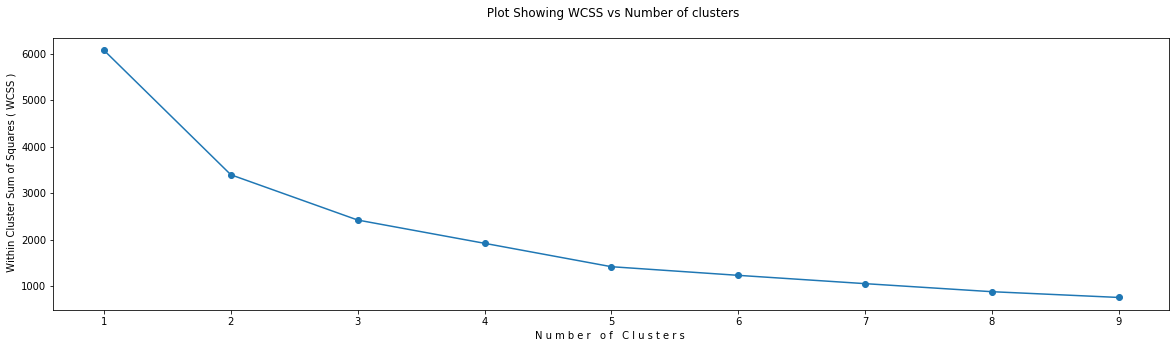

In [141]:
WccsPlot(pca_df , ['Component 3', 'Component 4'])

### 3-II bb. K-Means Clustering 

Using the transfomed cosine similarity data K-Means clustering was performed using k value of 4

In [142]:
pca_df

,Component 0,Component 1,Component 2,Component 3,Component 4
speaker,,,,,
1.Blue,-5.645715,-3.855342,-0.744075,1.434798,0.187391
1.Green,18.089621,7.744622,1.765670,-0.855388,4.610743
1.Pink,8.599900,-4.128486,4.983291,-1.026312,0.316655
10.Orange,-2.560557,-5.426904,1.507493,-0.915328,-0.435296
10.Pink,11.620716,-1.463264,-1.257712,-3.911203,1.698679
...,...,...,...,...,...
8.Green,11.391356,-4.711189,-1.150780,-0.104587,0.977635
8.Orange,-0.755854,-6.685619,-1.894704,-0.232321,-1.481813
9.Blue,-1.391698,3.088981,-2.371982,-2.931816,1.704470


Specify the number of optimal clusters. As  first 3 components covered 86% of the total variance in the dataset, drop the other two components

In [143]:
# Use Kmeans using n_clusters = 4. 

kmeans_pca_ = KMeans(n_clusters = 4, init = 'k-means++', random_state = 56)

# Fit pca data  
modelkmeans_ = kmeans_pca_.fit(pca_df.drop(columns = ['Component 3', 'Component 4']))  

In [144]:
print("--------------------------- Cluster Counts (K-Means) ------------------------------------")
# Count of labels using unique method provided by numpy. The labels can be converted to Series 
# and then value_counts() can also be used

unique ,counts = np.unique(kmeans_pca_.labels_ , return_counts = True)

# Using dictionary to keep count of cluster labels 
count_dict = dict(zip(unique,counts))

#Display as dataframe
pd.DataFrame(count_dict.items(), columns = ['Cluster number' , 'Frequency' ])

--------------------------- Cluster Counts (K-Means) ------------------------------------


,Cluster number,Frequency
0,0,42
1,1,3
2,2,19
3,3,20


In [145]:
df_speaker = gap_corpus.get_speakers_dataframe()

#### Represent Dataset with Corresponding Cluster Number

In [146]:
temp_df = pd.concat([df_speaker, 
                     pca_df.drop(columns = ['Component 3','Component 4']),
                    pd.Series(kmeans_pca_.labels_ , index = pca_df.index, name = 'Cluster Number')],
                    axis = 1)
display(temp_df)

,vectors,meta.Year at UFV,meta.Gender,meta.English,meta.AIS,meta.AII,meta.Ind_TE,meta.Ind_WW,meta.Ind_TM,meta.Ind_Eff,meta.Ind_QW,meta.Ind_Sat,meta.Ind_Lead,meta.Group Number,Component 0,Component 1,Component 2,Cluster Number
1.Pink,[],4,2,1,88.0,40.0,5,5.0,5.0,5.0,5.0,5.0,5,1,8.599900,-4.128486,4.983291,2
1.Blue,[],1,2,1,64.0,76.0,5,5.0,5.0,5.0,5.0,5.0,2,1,-5.645715,-3.855342,-0.744075,3
1.Green,[],6,1,2,85.0,12.0,4,5.0,5.0,4.0,5.0,4.6,4,1,18.089621,7.744622,1.765670,1
10.Orange,[],4,2,1,55.0,56.0,5,4.0,5.0,5.0,4.0,4.6,4,10,-2.560557,-5.426904,1.507493,3
10.Pink,[],1,1,1,57.0,33.0,5,4.0,4.0,5.0,4.0,4.4,3,10,11.620716,-1.463264,-1.257712,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.Green,[],1,2,1,84.0,34.0,4,5.0,5.0,5.0,4.0,4.6,5,8,11.391356,-4.711189,-1.150780,2
8.Orange,[],1,2,1,78.0,36.0,4,4.0,4.0,5.0,5.0,4.4,3,8,-0.755854,-6.685619,-1.894704,3
9.Green,[],2,1,1,67.0,20.0,4,5.0,5.0,5.0,5.0,4.8,4,9,4.013768,1.330999,-3.007314,2
9.Blue,[],1,2,1,62.0,24.0,4,4.0,4.0,3.0,3.0,3.6,2,9,-1.391698,3.088981,-2.371982,0


### 2D Cluster plot for K-Means

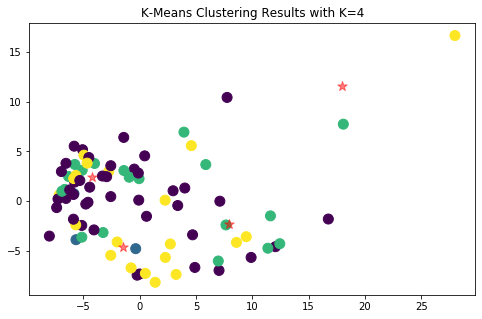

In [147]:
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(temp_df['Component 0'], temp_df['Component 1'], 
            s = 100, c=kmeans_pca_.labels_,) 
plt.title('K-Means Clustering Results with K=4')
plt.scatter(kmeans_pca_.cluster_centers_[:,0], 
            kmeans_pca_.cluster_centers_[:,1], 
            marker='*', s=100, c='r', alpha = 0.5)


### 3D  Cluster Plot for K-Means clustering 

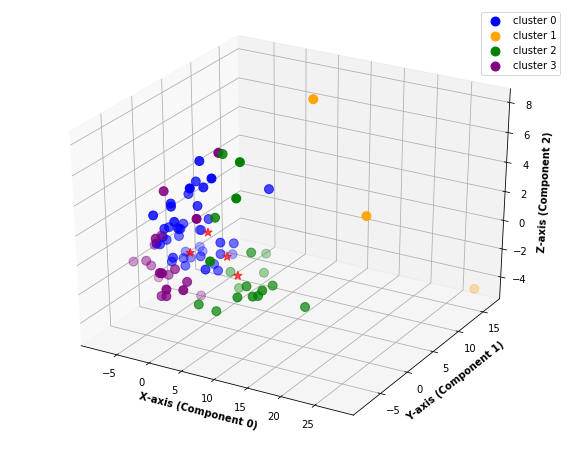

In [148]:
y_clusters = kmeans_pca_.labels_  
x = pca_df.drop(columns = ['Component 3','Component 4']).values

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 80 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 80 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 80 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 80 , color = 'purple', label = "cluster 3")
ax.scatter(kmeans_pca.cluster_centers_[:,0], 
             kmeans_pca.cluster_centers_[:,1],
             kmeans_pca.cluster_centers_[:,2] , marker='*', s = 80, c=['red'], alpha = 0.7)
ax.set_xlabel('X-axis (Component 0)', fontweight ='bold')
ax.set_ylabel('Y-axis (Component 1)', fontweight ='bold')
ax.set_zlabel('Z-axis (Component 2)', fontweight ='bold')
ax.legend()
plt.show()

### 3-II bc. Fuzzy Clustering / CMeans Clustering (Overlapping Clusters) 

In [149]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [150]:
fcm = FCM(n_clusters = 4)
vb_ = pca_df.drop(columns = ['Component 3', 'Component 4'])
modelfuzzy_ = fcm.fit(vb_.values)


In [151]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(vb_.values)

### 2D Cluster plot for C-Means

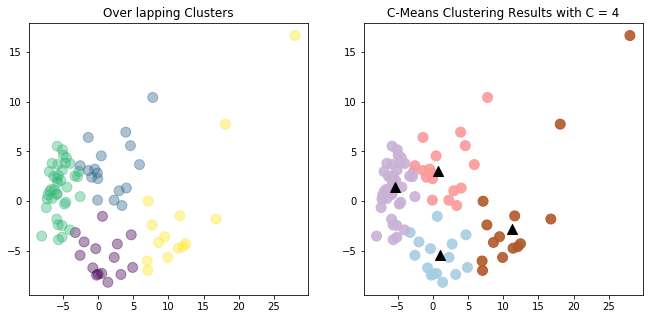

In [152]:
X = vb_.values

f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.4, c = fcm_labels, s=100)
axes[0].title.set_text("Over lapping Clusters")
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.9, s = 100, cmap="Paired")
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="^", s=100, c='black')
plt.title('C-Means Clustering Results with C = 4')
plt.show()

# References

[1] Bird, S., Loper, E., &amp; Klein, E. (2016). Natural language processing with python (3rd ed.). Sebastopol, CA: O'Reilly Media.

[2] Braley, M. K., & Murray, G. (2018). The Group Affect and Performance (GAP) Corpus. Proceedings of the Group Interaction Frontiers in Technology (GIFT'18). https://doi.org/10.1145/3279981.3279985 

[3] Gupta, A. (2021, June 2). Fuzzy C-Means Clustering (FCM) Algorithm [Web log post]. Retrieved April 10, 2022, from https://medium.com/geekculture/fuzzy-c-means-clustering-fcm-algorithm-in-machine-learning-c2e51e586fff

[4] James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning: With applications in R. R. Springer Publishing Company, Incorporated. 

[5] Jurafsky, D., & Martin, J. H. (2022). Speech and Language Processing. Stanford University (3rd ed.). Retrieved March 25, 2022, from https://web.stanford.edu/~jurafsky/slp3/. 

[6] Kubasova, U., Murray, G., & Braley, M. K. (2019). Analyzing Verbal and Nonverbal Features for Predicting Group Performance. https://doi.org/10.48550/arXiv.1907.01369 

[7] Leskovec, J., Rajaraman, A., & Ullman, J. D. (2015). Mining of massive datasets (2nd ed.). Cambridge University Press. 

[8] Müller Andreas C., &amp; Guido, S. (2018). Introduction to machine learning with python: A guide for data scientists. O'Reilly Media, Inc. 

[9] Sharma, A. (2020, January 1). Principal Component Analysis (PCA) in Python Tutorial. Retrieved April 1, 2022, from https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python. 

